In [1]:
import requests as rq
import json
import pandas as pd
import numpy as np
from textwrap import wrap
from matplotlib import pyplot as plt
from TCGA_files import *
#from ensembleAPI import geneinfo, genesinfo
from IPython.display import HTML
from sklearn import metrics
from hsbmpy import *

In [74]:
import importlib, hsbmpy
importlib.reload(hsbmpy)
from hsbmpy import *

## query many

In [49]:
level = 1
#setup='highlyvariable_colonrectal'
#setup = 'oversigma_10tissue'
#label = 'disease_type'
label='primary_site'
L = 5
labels = ['primary_site', 'disease_type', 'disease_tissue']
#labels = ['primary_site', 'secondary_site']
algorithm = 'topsbm'
#labels = ['primary_site', 'secondary_site', 'status']
#labels=['RPPA Clusters']
directory = "/Volumes/GoogleDrive/My Drive/tesi_magistrale/tesi/results/hsbm/highlyvariable_7tissues/"
df_clusters = pd.read_csv("%s/%s/%s_level_%d_clusters.csv"%(directory,algorithm,algorithm,L), header=[0])
df_clusters.head()

Cluster 1
0  fffc1088-c5a6-46a0-b050-
1  59263847-1392-47d1-912c-
2  5d57e2e2-a409-4392-8ea8-
3  5cb385a7-dab3-486c-83af-
4  5b9b9a3d-51bf-4f62-bf19-

In [68]:
#df_files = pd.read_csv("/Users/filippo/Developer/tesi/gtex/files.dat", index_col=[0], header=[0])
#df_files = pd.read_csv("/Users/filippo/Developer/tesi/results/counts/files.dat", index_col=[0], header=[0])
df_files = pd.read_csv("%s/files.dat"%directory, index_col=[0], header=[0])
df_files.head()

primary_site  \
0                                                                   
ab30d37c-c510-496f-a704-6687ea39b847.htseq.coun...   Cervix uteri   
e89c96d6-a2ab-4bac-bbba-8c52d49a3edf.htseq.coun...  Thyroid gland   
d2587070-cb7d-440d-ae49-52f5077248e6.htseq.coun...          Colon   
e733093b-8a60-46d7-9ddd-ec8a82206126.htseq.coun...         Breast   
f02be12f-2e34-4089-be5c-0f81ca6038c8.htseq.coun...   Cervix uteri   

                                                                             disease_type  
0                                                                                          
ab30d37c-c510-496f-a704-6687ea39b847.htseq.coun...                Squamous Cell Neoplasms  
e89c96d6-a2ab-4bac-bbba-8c52d49a3edf.htseq.coun...           Adenomas and Adenocarcinomas  
d2587070-cb7d-440d-ae49-52f5077248e6.htseq.coun...  Cystic, Mucinous and Serous Neoplasms  
e733093b-8a60-46d7-9ddd-ec8a82206126.htseq.coun...           Ductal and Lobular Neoplasms  
f02be12f-2e34-4089-be5c-0f81ca6038c8.htseq.coun...           Adenomas and Adenocarcinomas

In [60]:
get_file('f02be12f-2e34-4089-be5c-0f81ca60', df_files)['disease_tissue']

'Cervix uteri[Adenomas and Adenocarcinomas]'

True primary_site 4


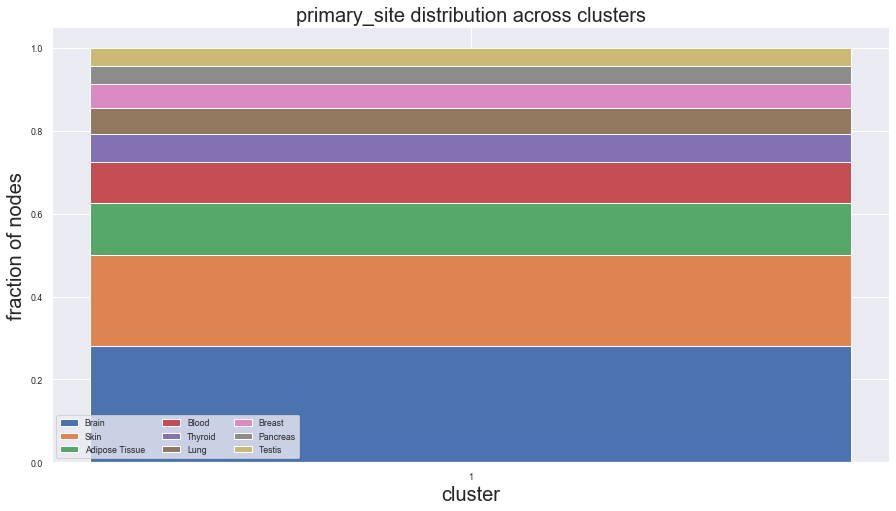

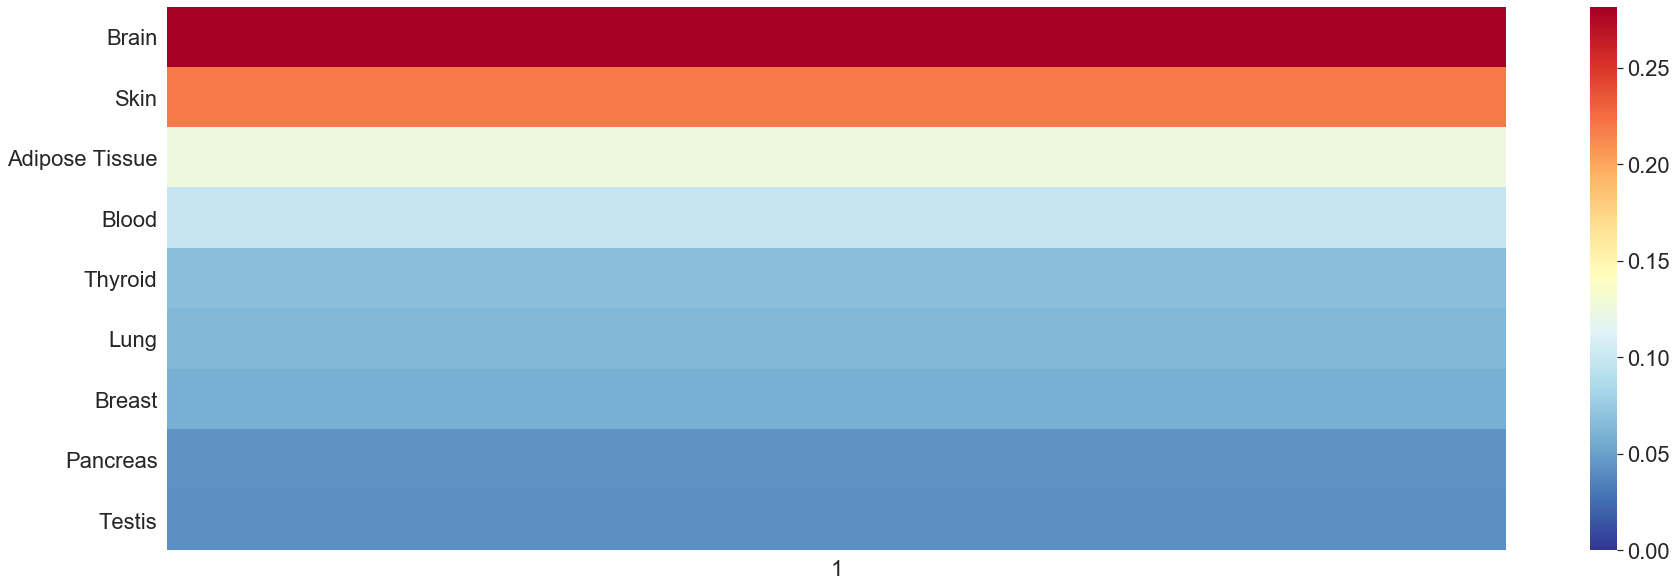

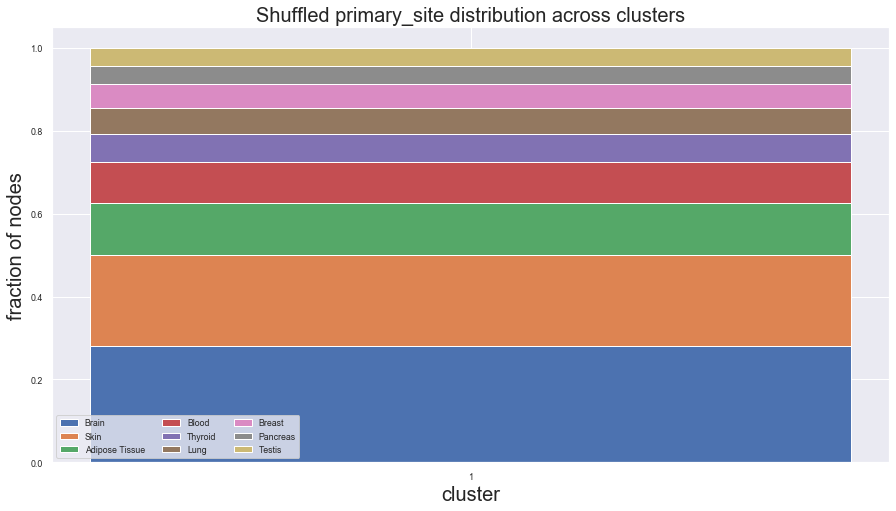

True primary_site 3


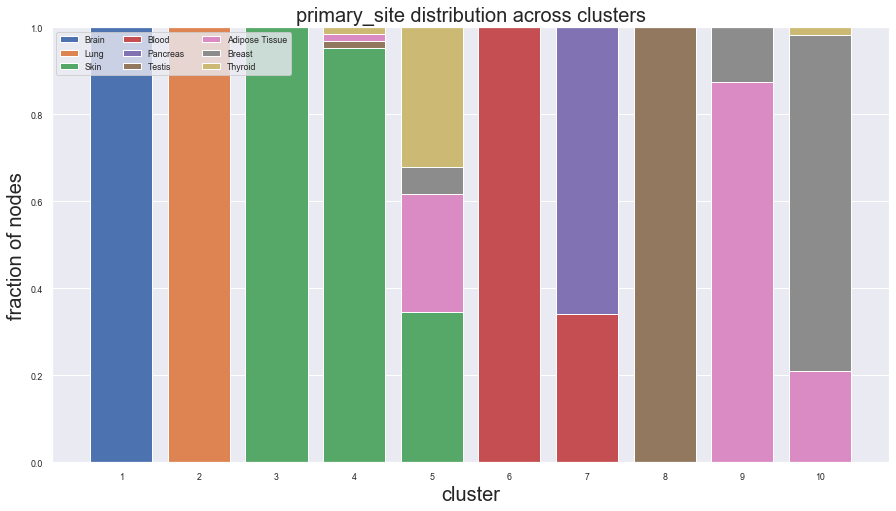

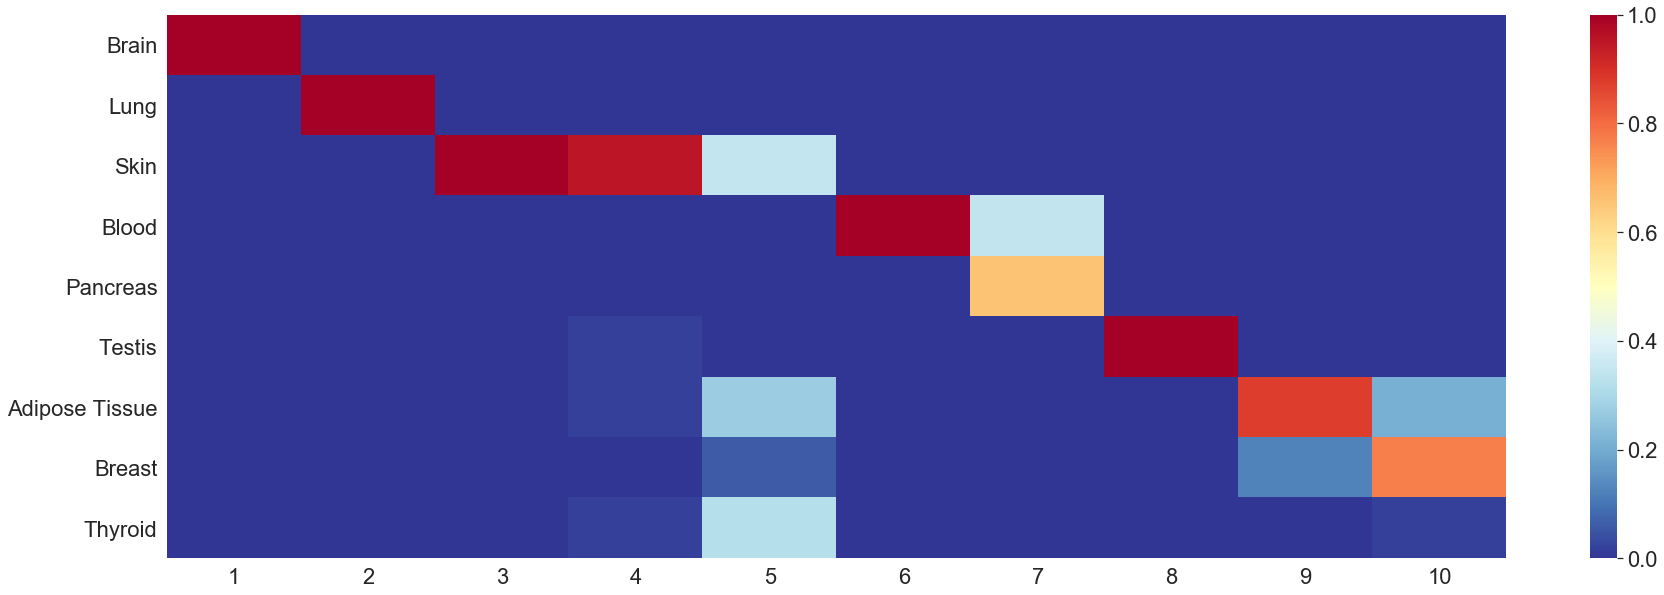

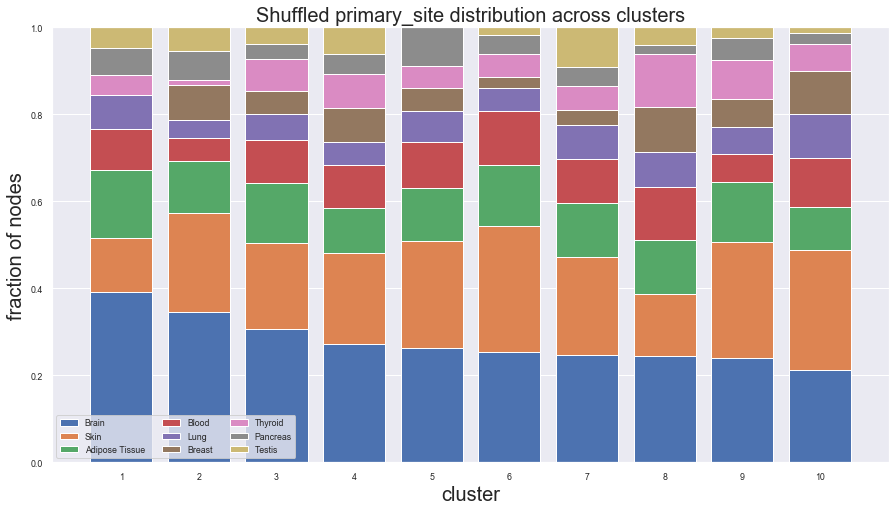

True primary_site 2


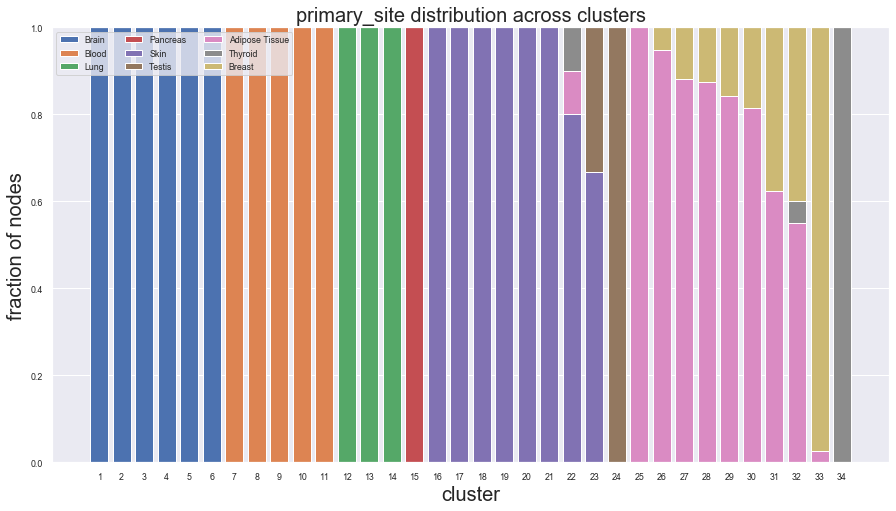

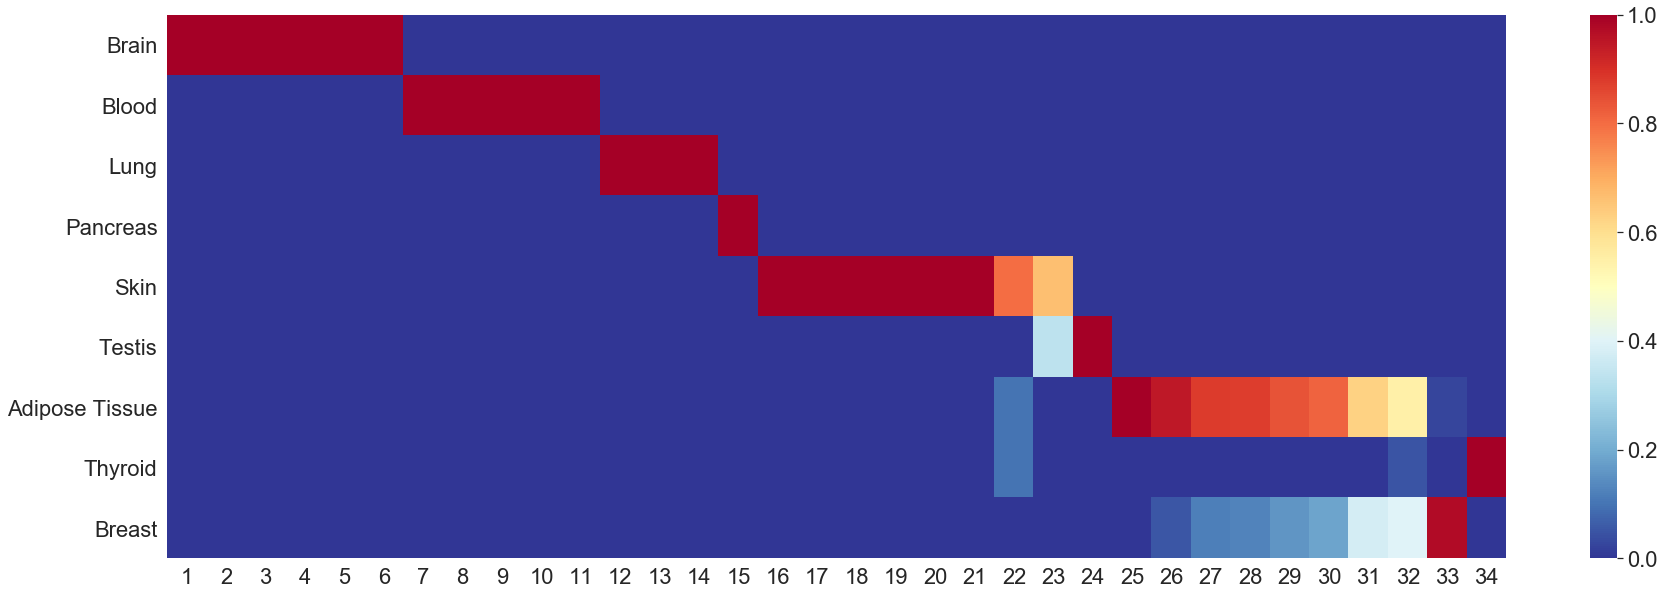

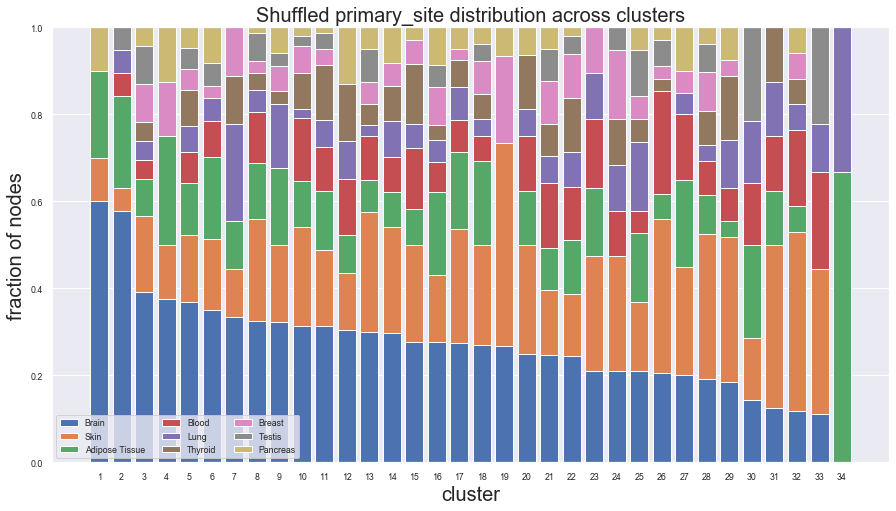

True primary_site 1


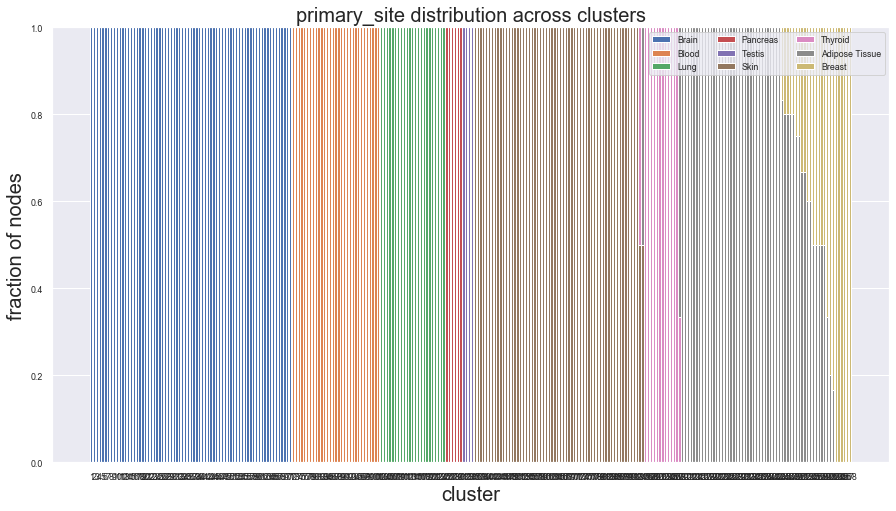

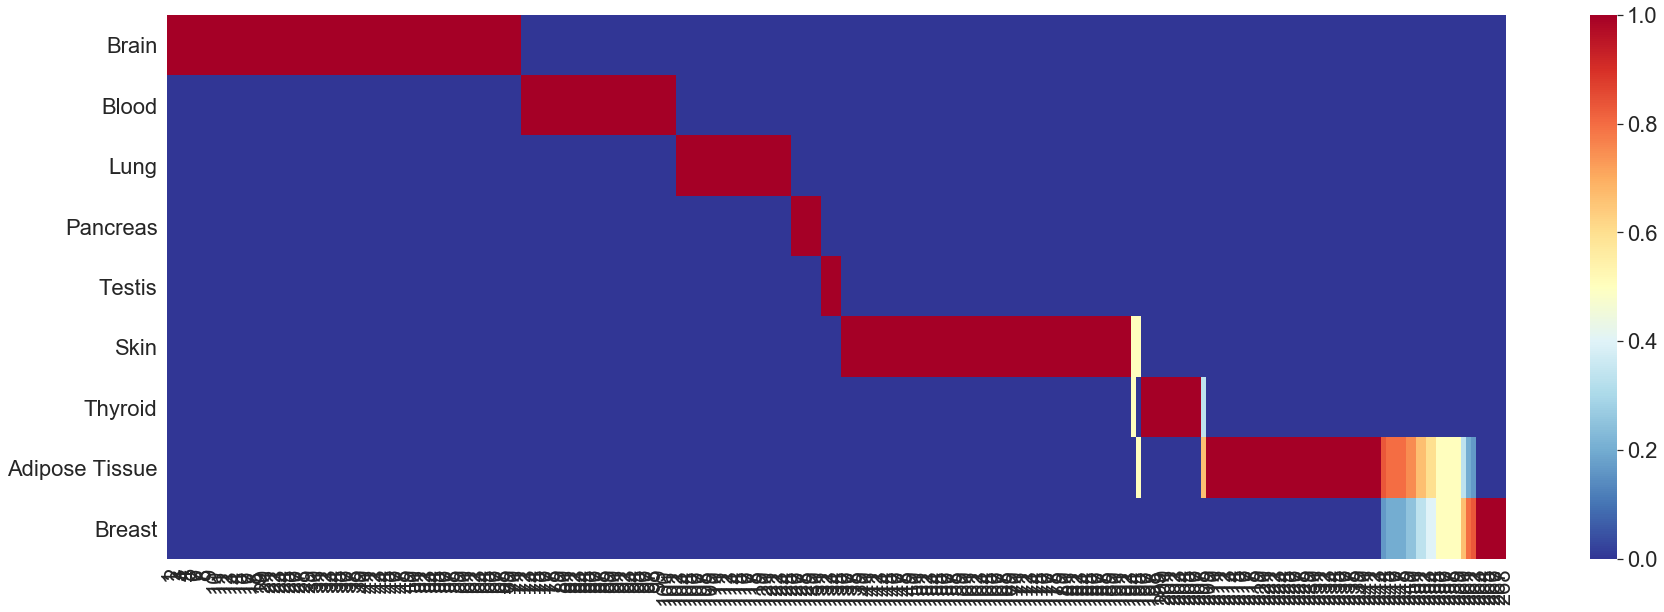

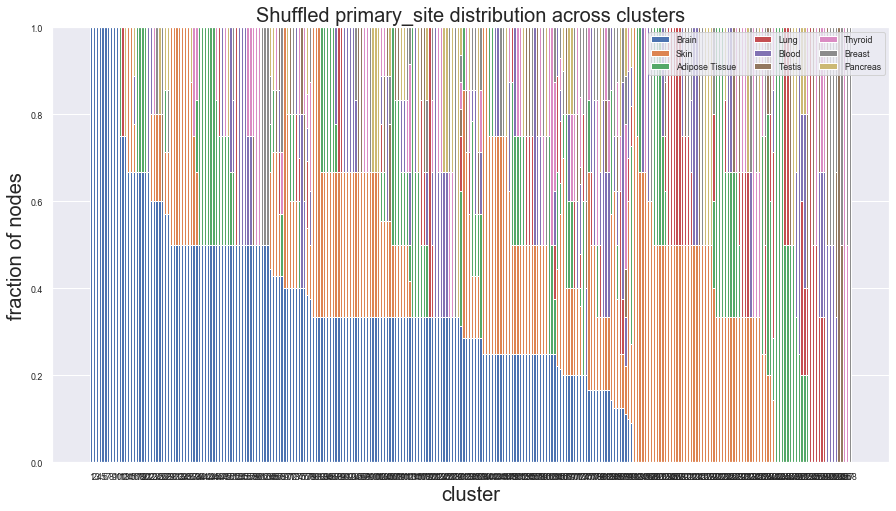

True secondary_site 4


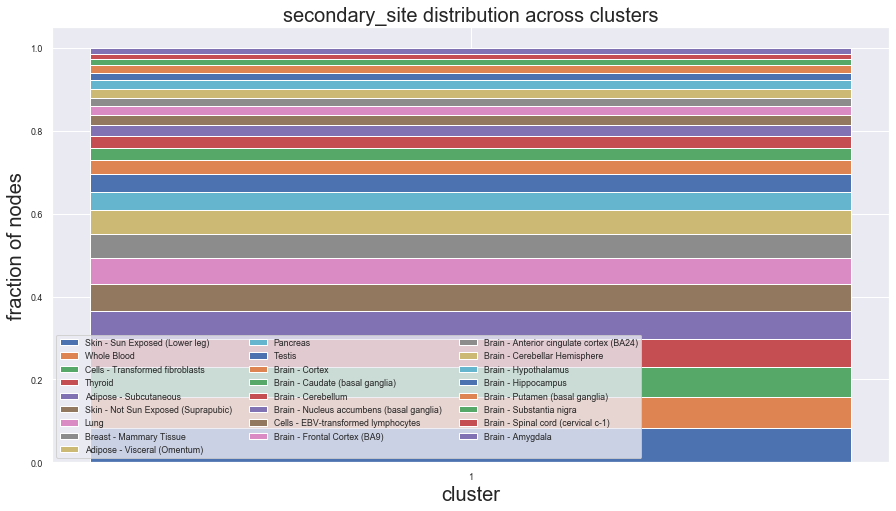

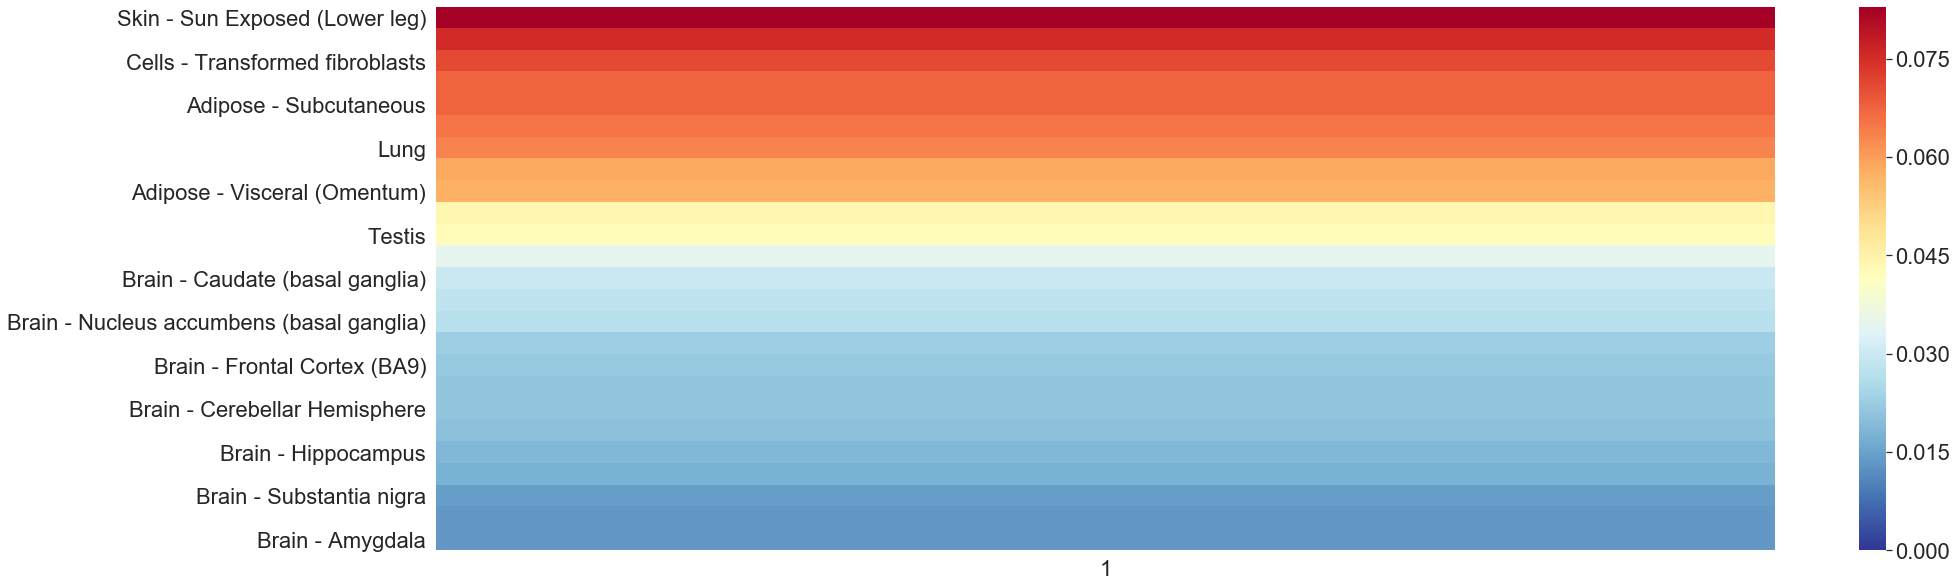

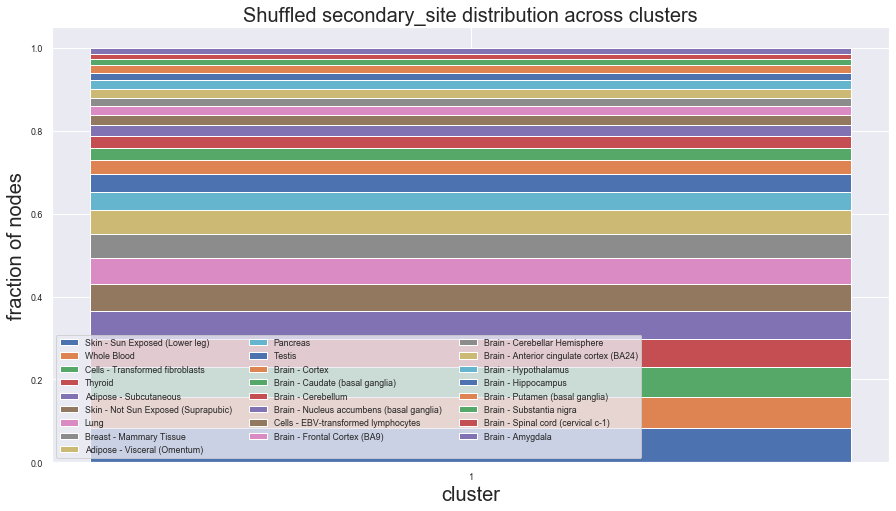

True secondary_site 3


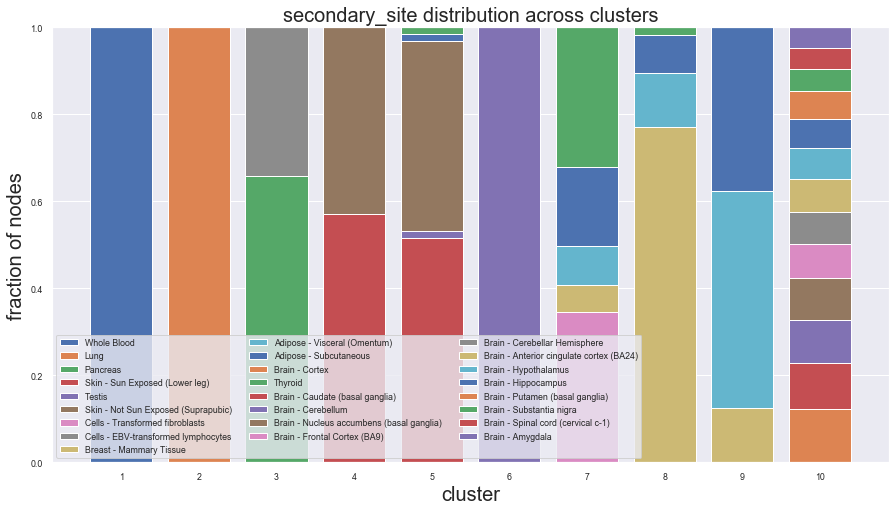

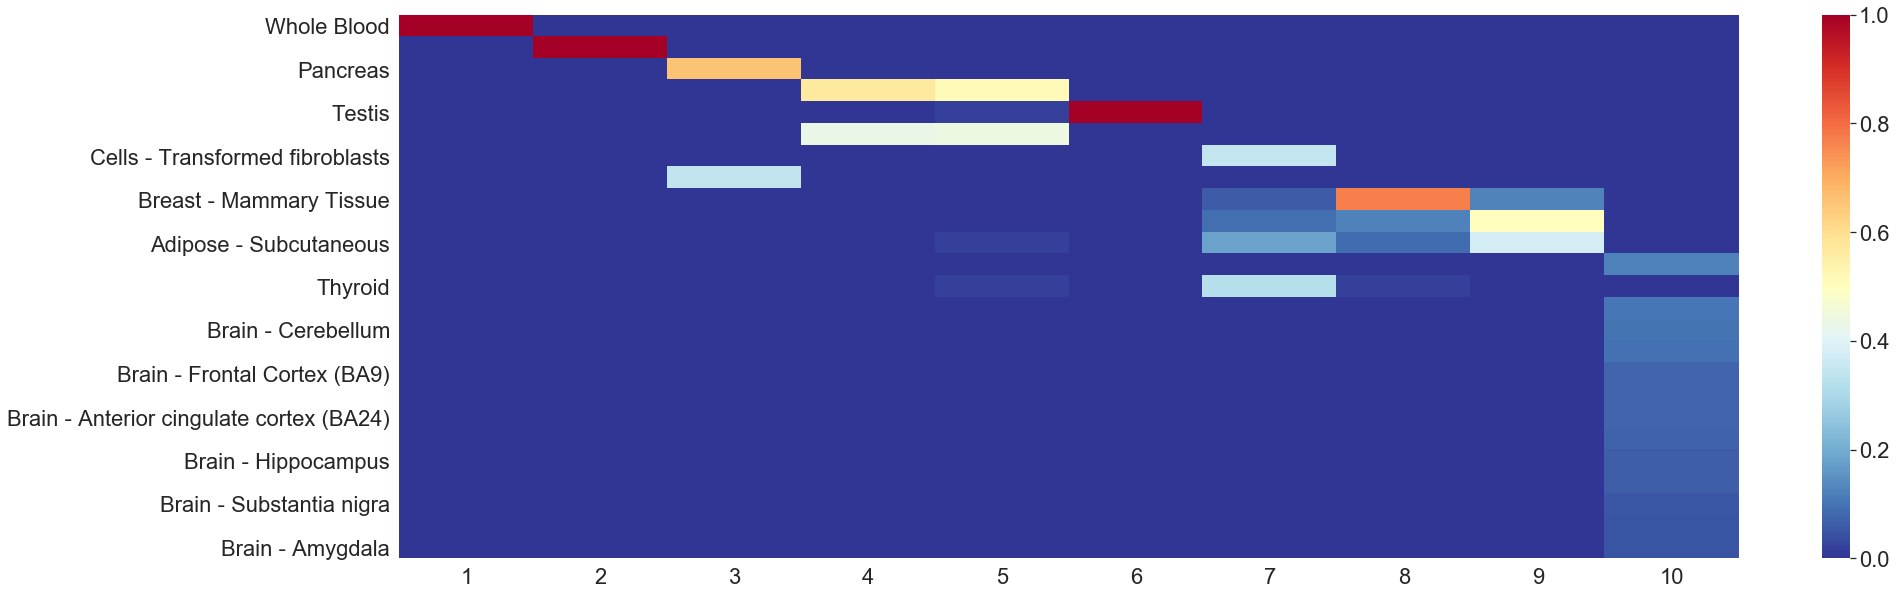

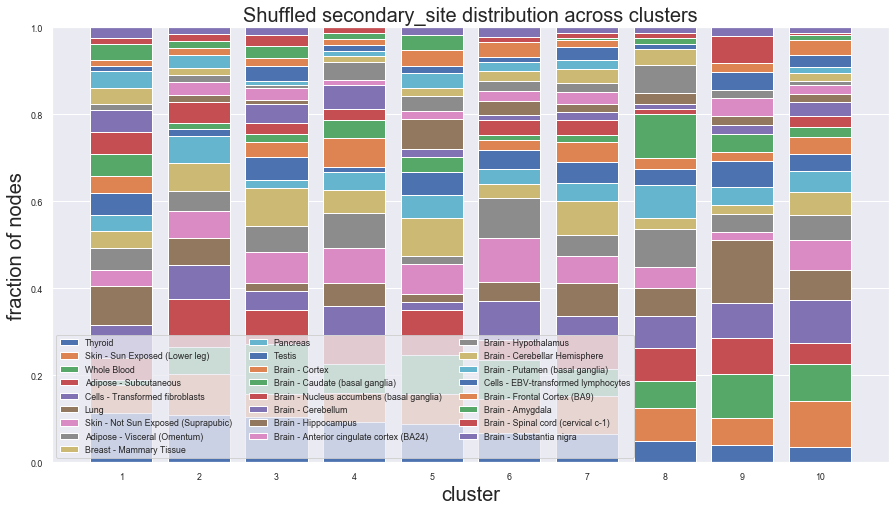

True secondary_site 2


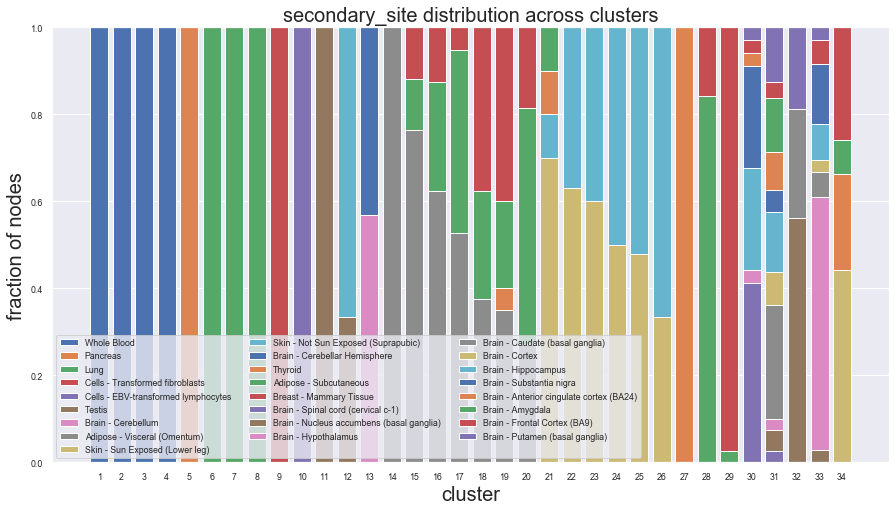

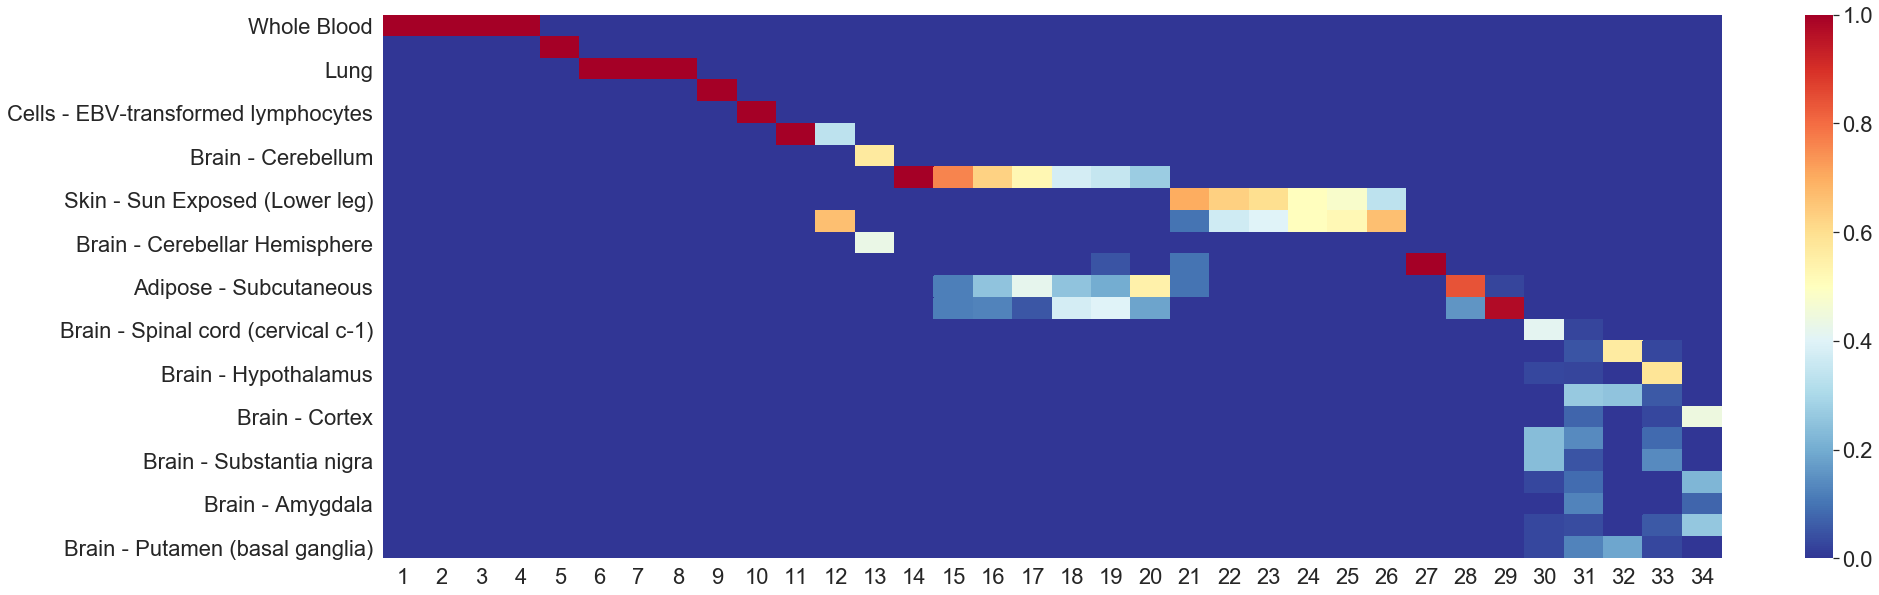

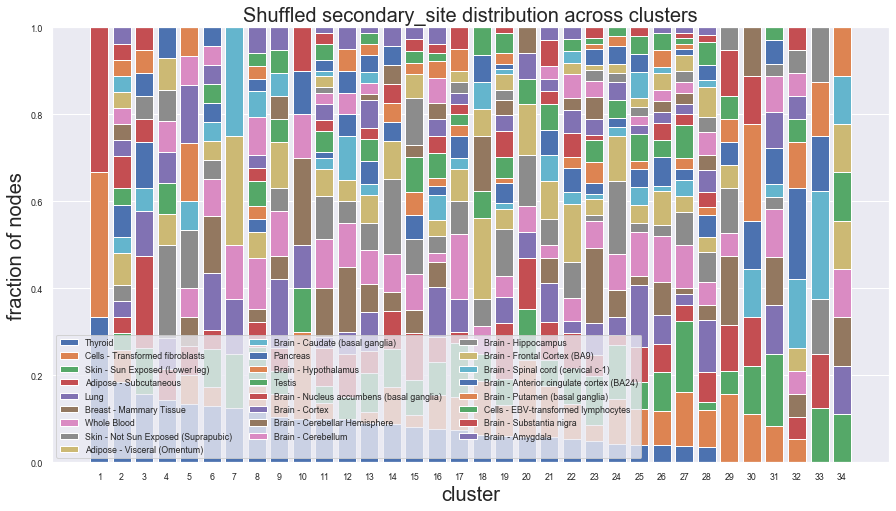

True secondary_site 1


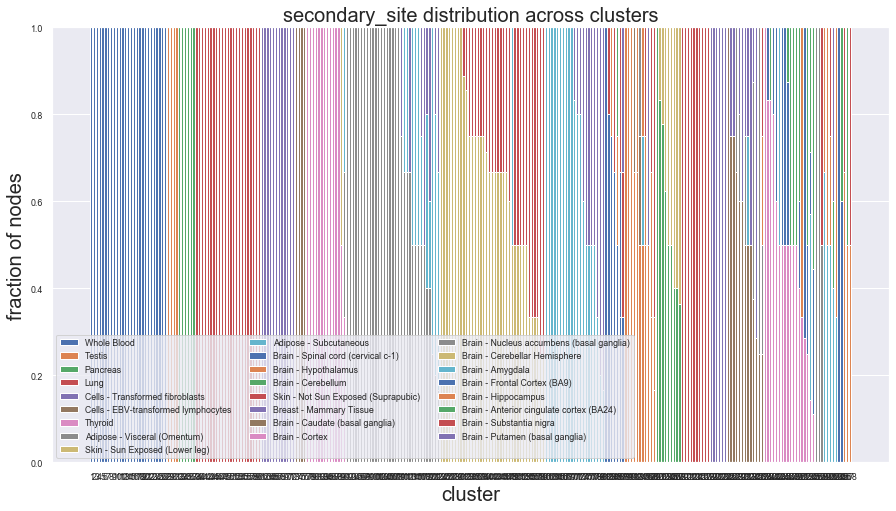

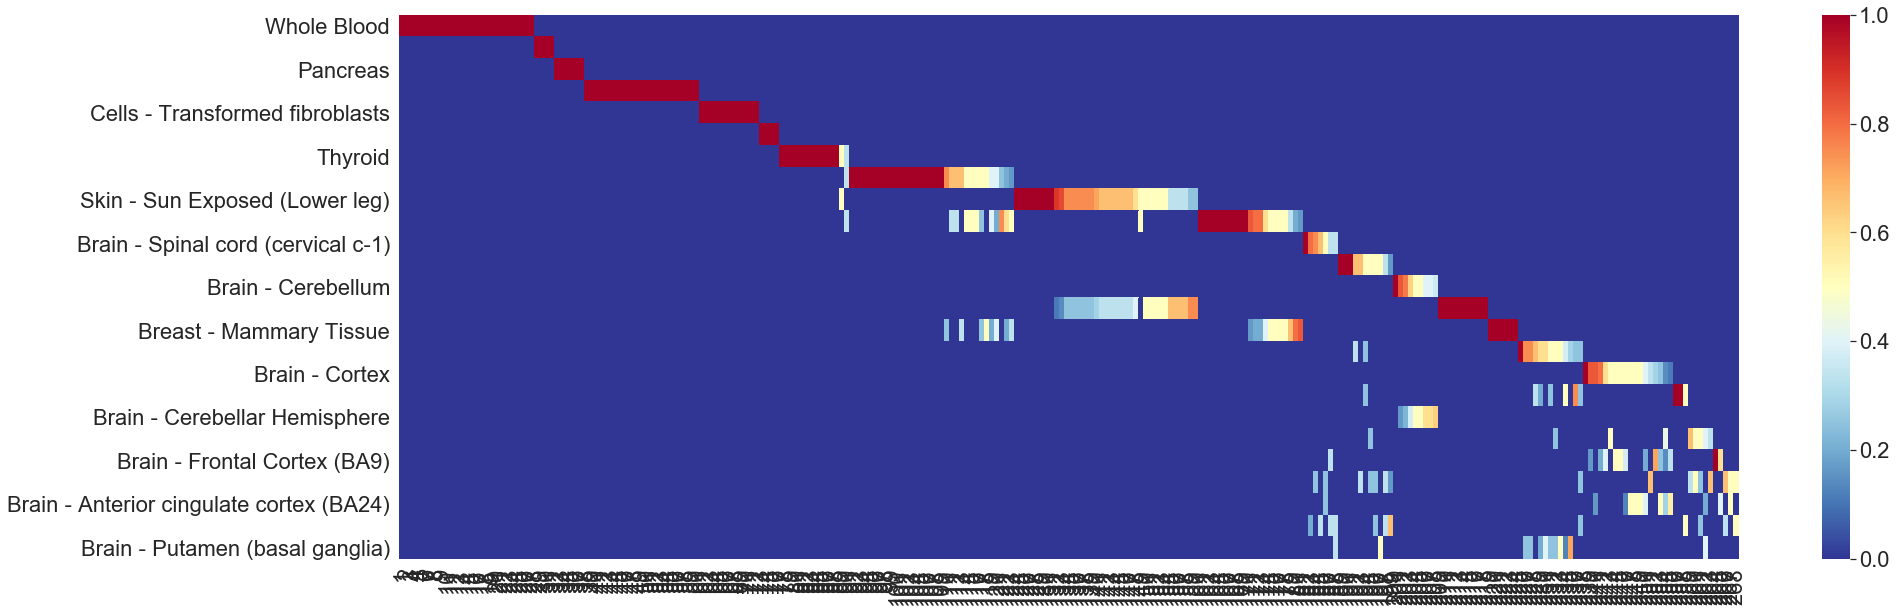

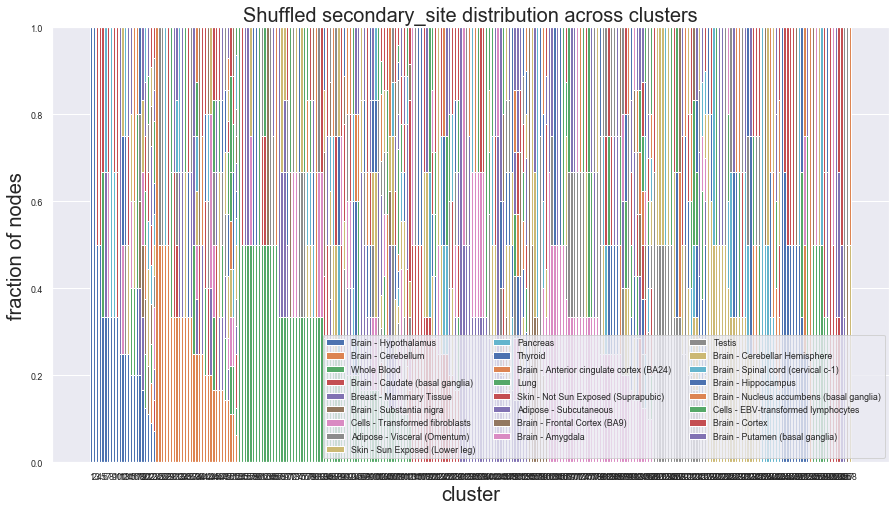

False primary_site 4


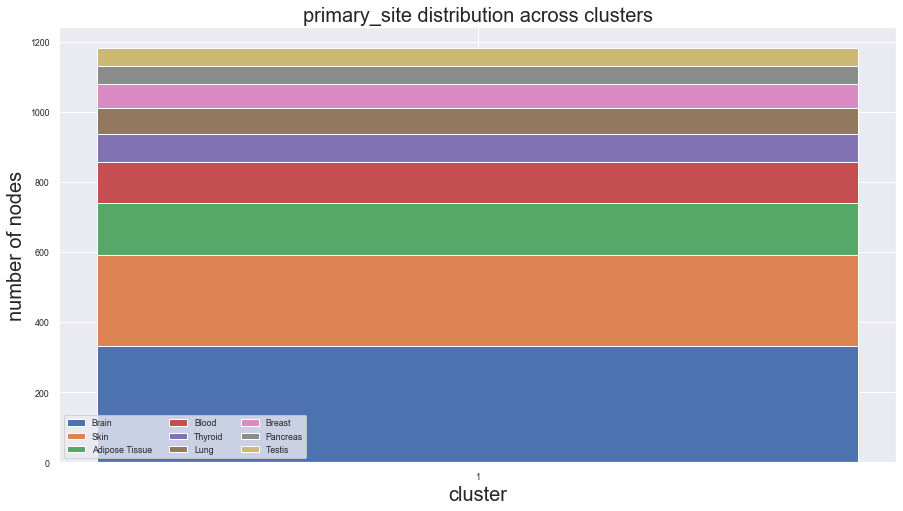

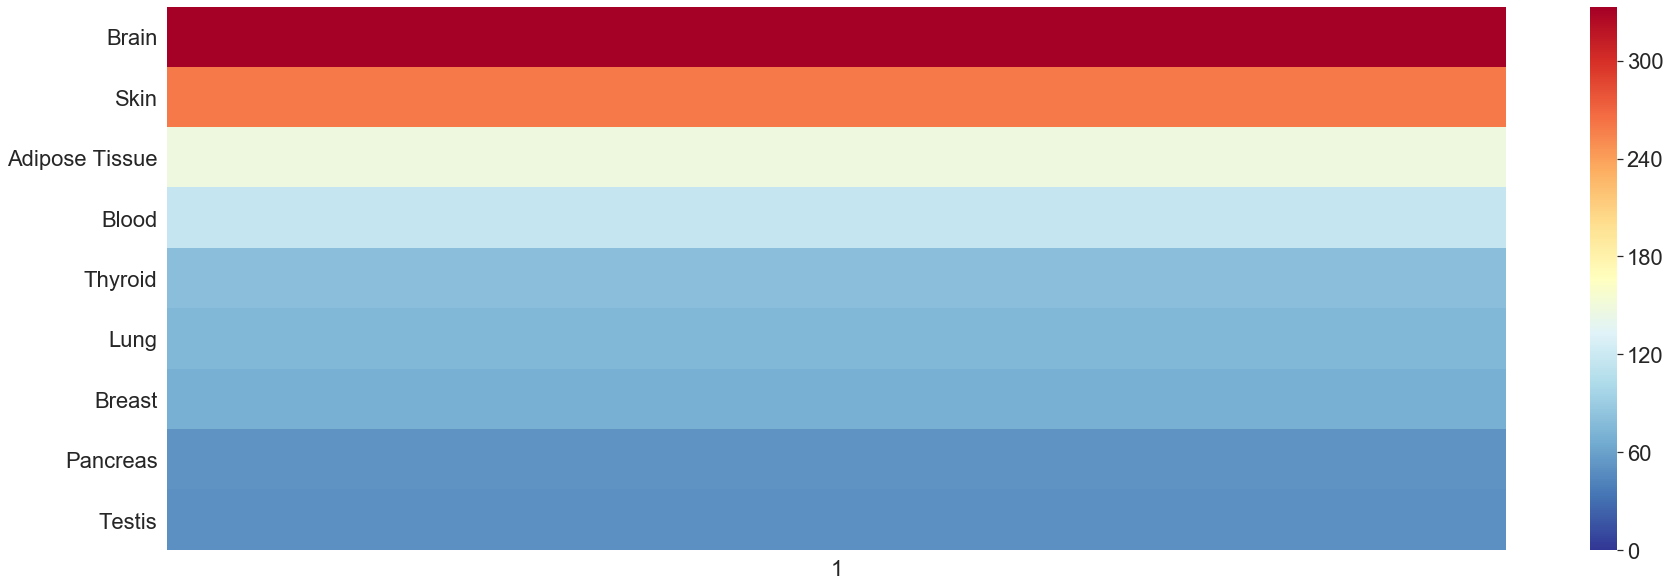

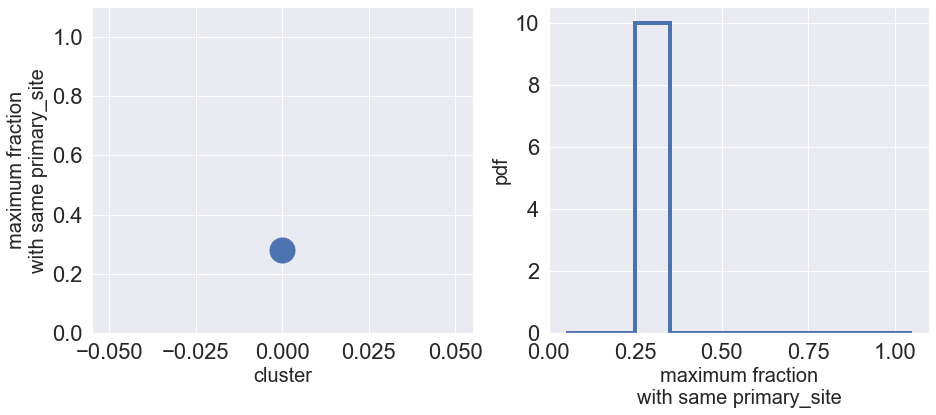

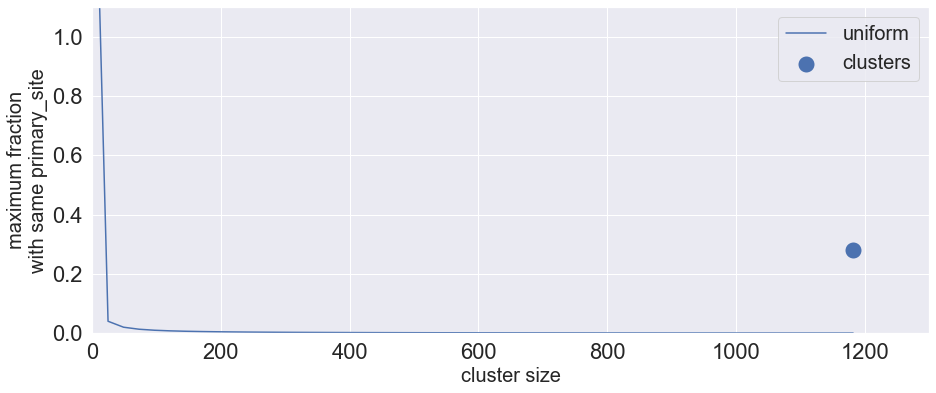

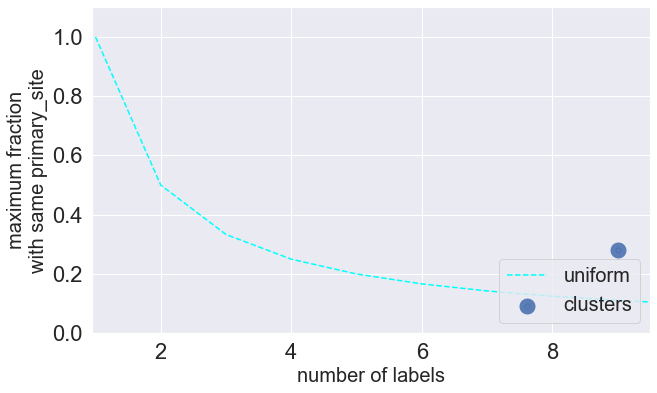

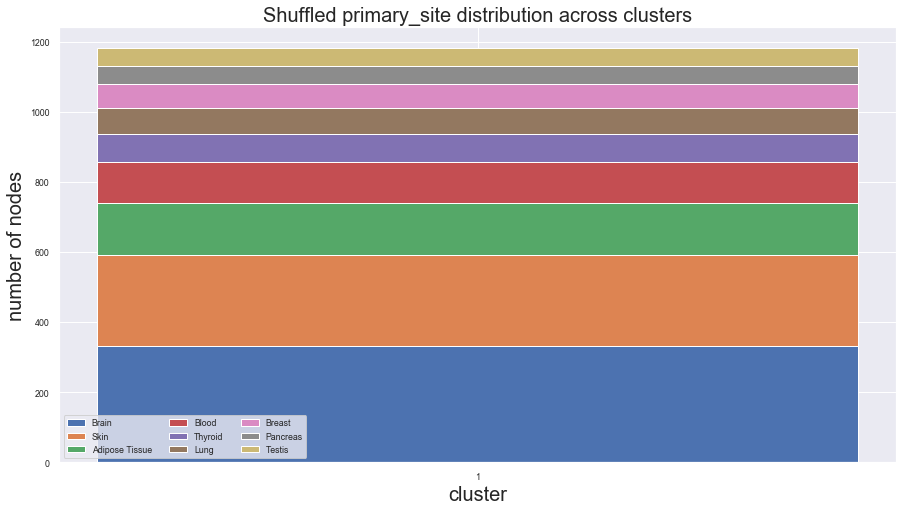

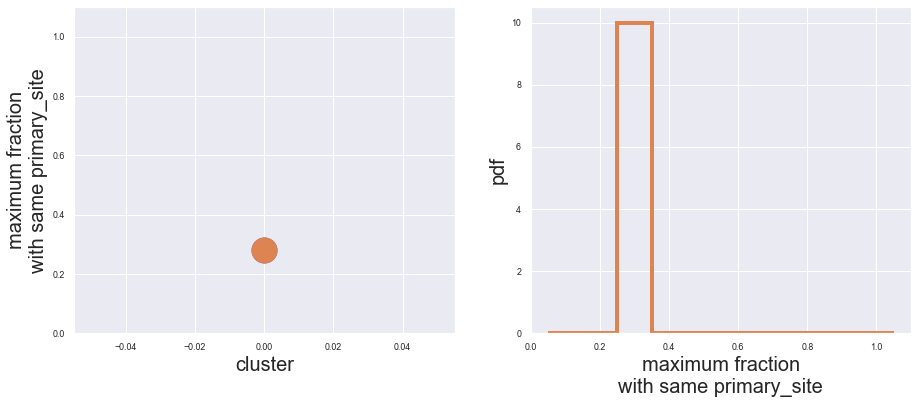

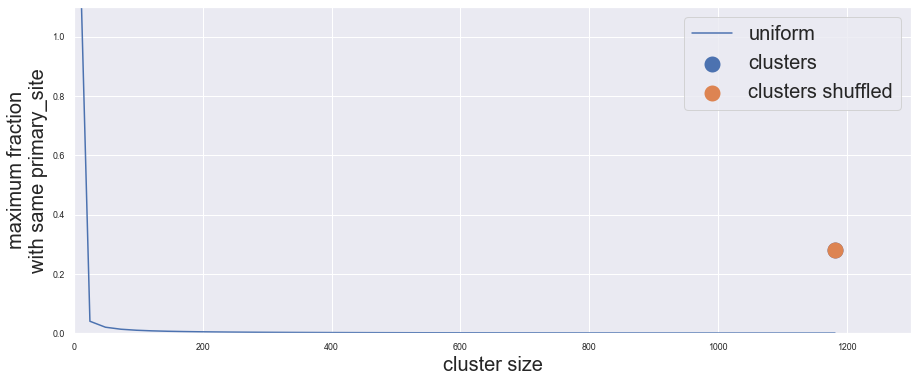

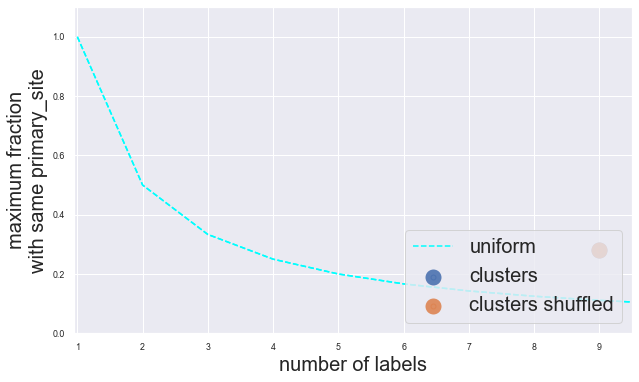

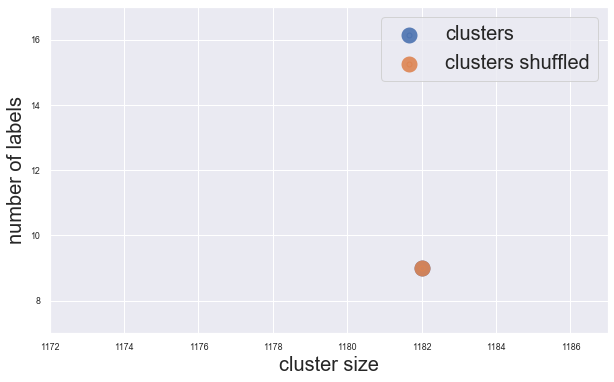

False primary_site 3


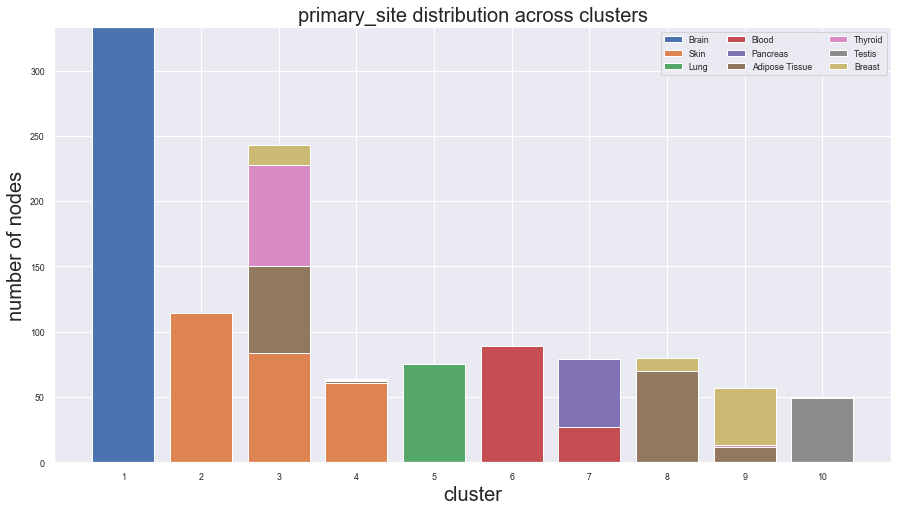

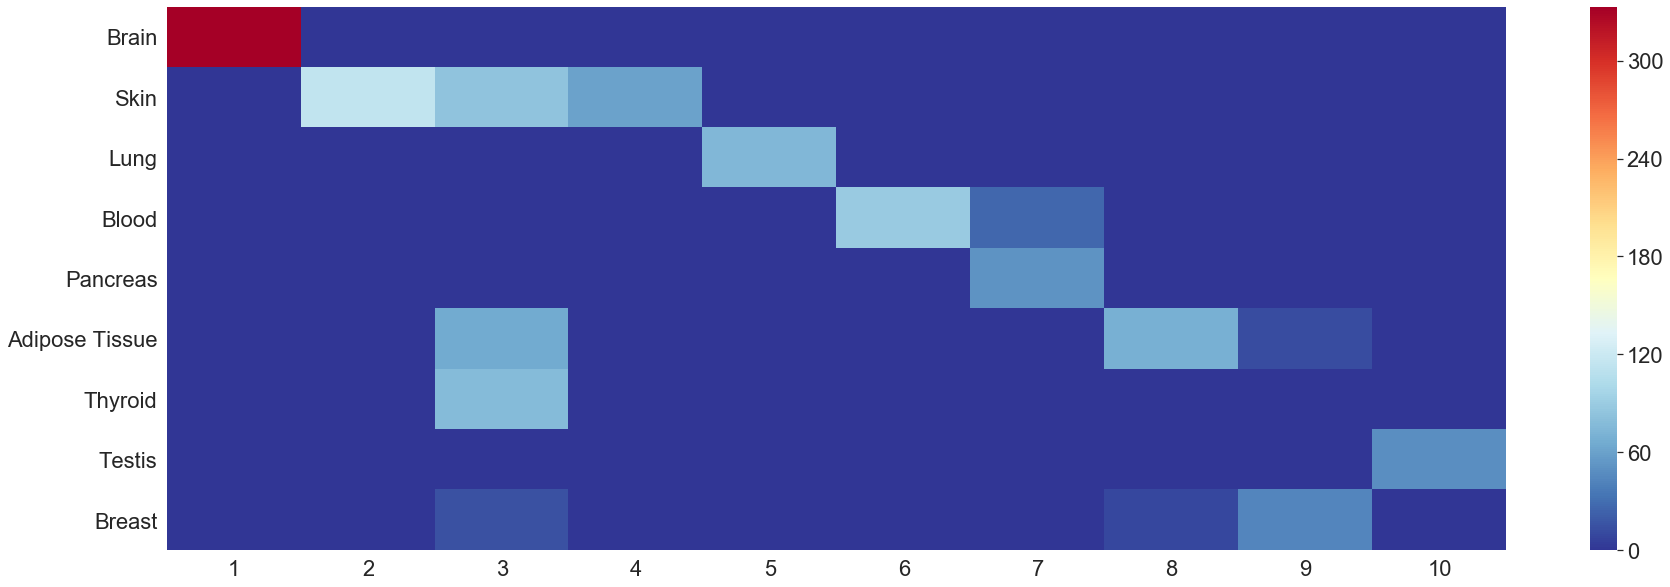

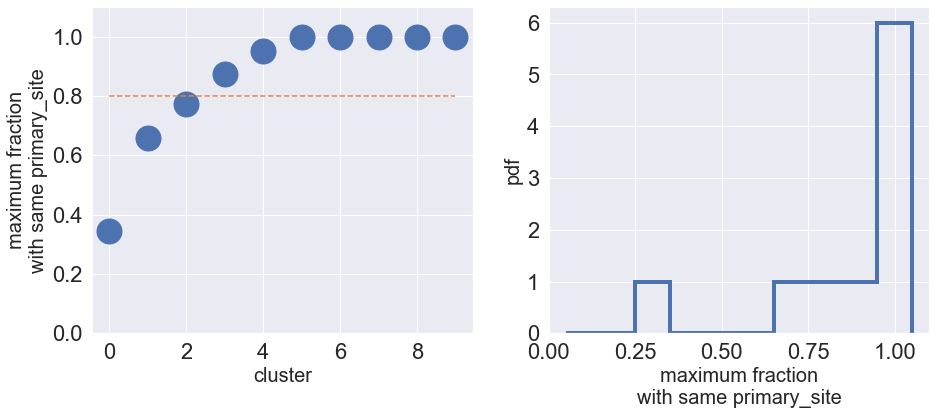

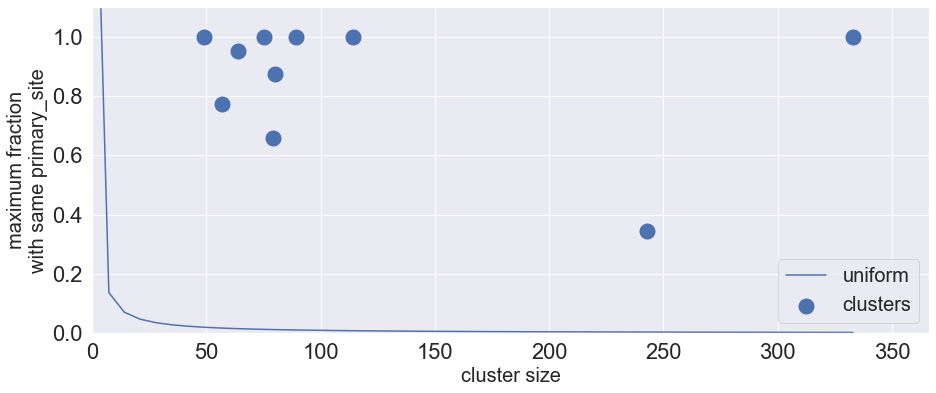

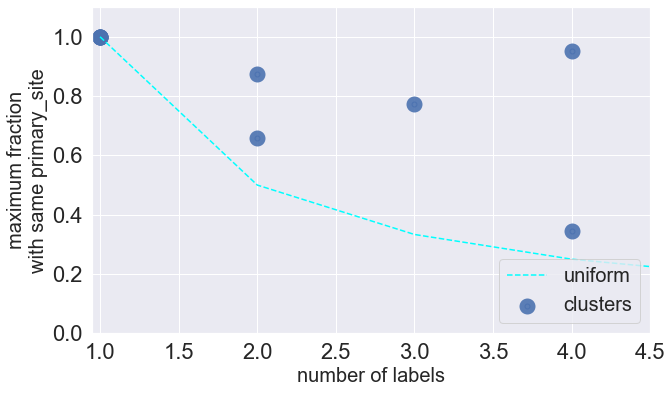

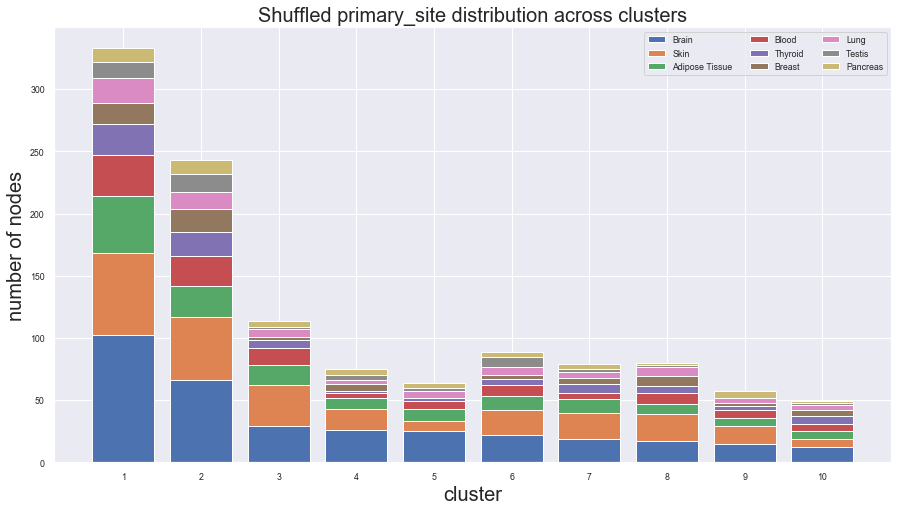

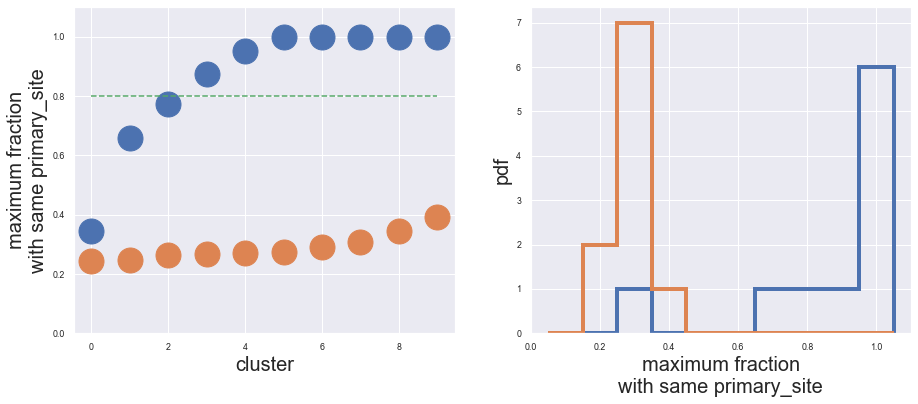

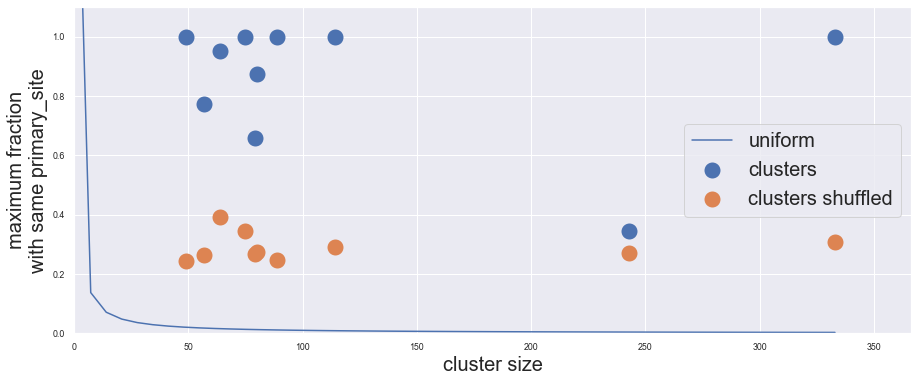

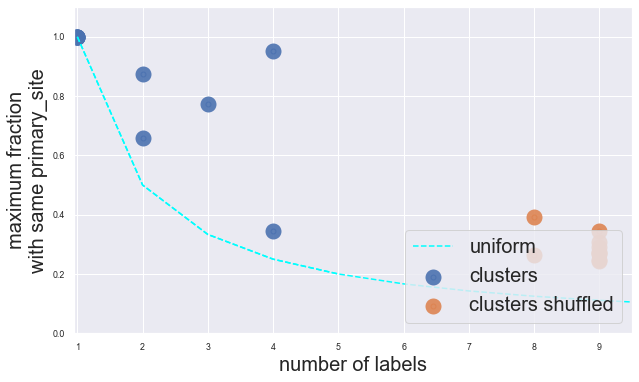

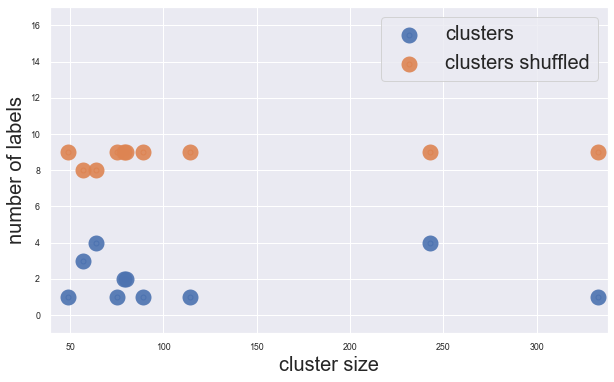

False primary_site 2


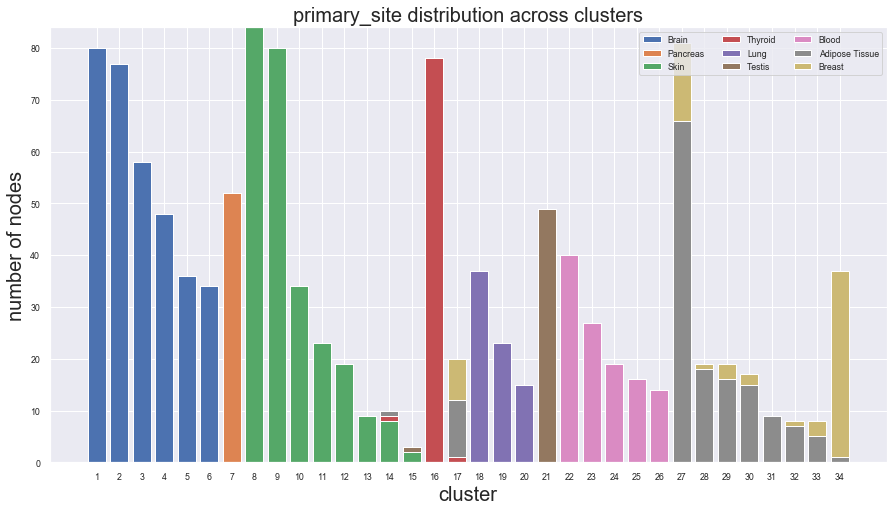

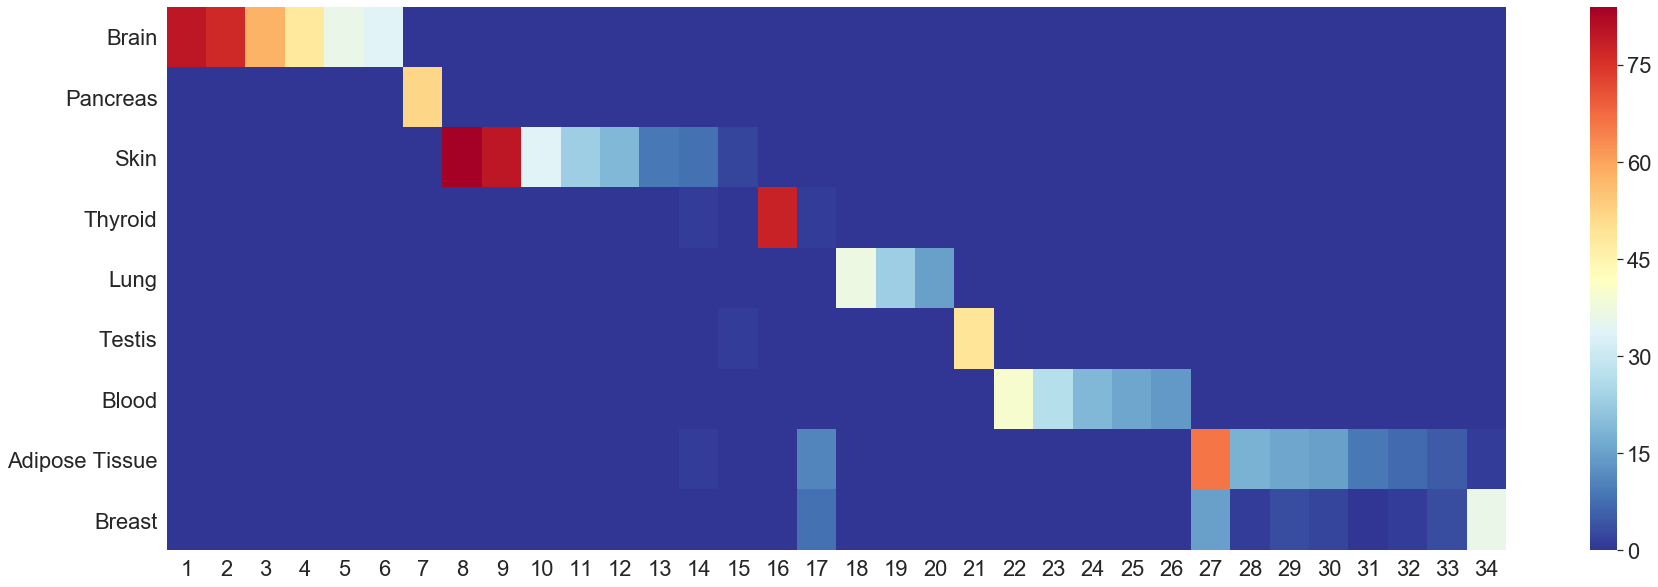

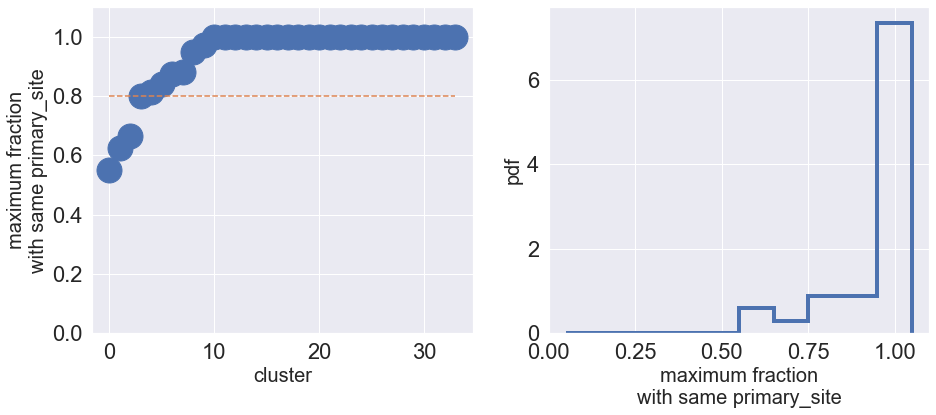

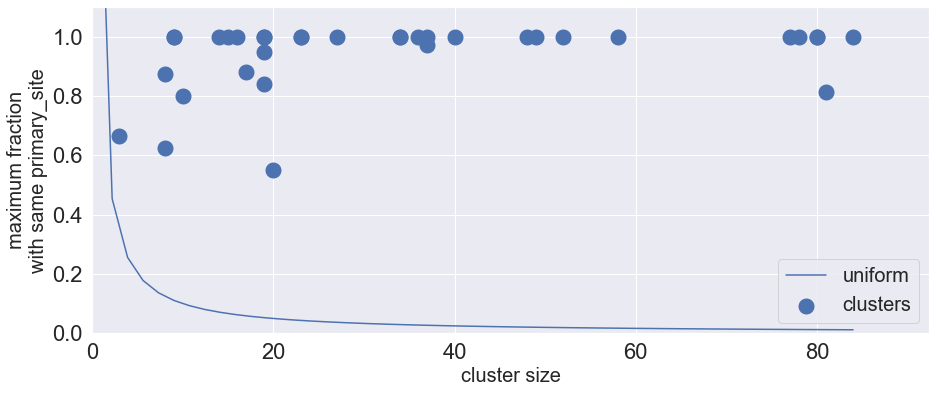

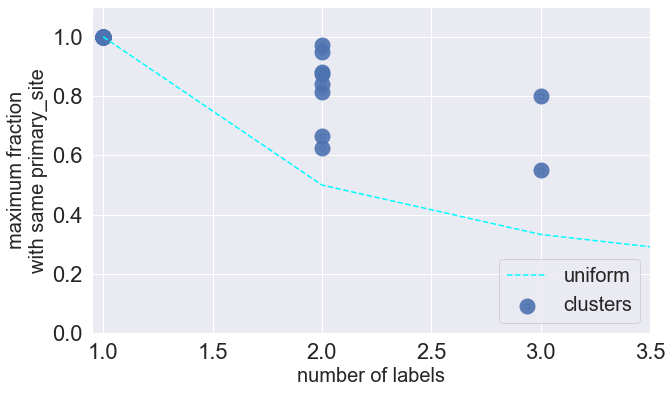

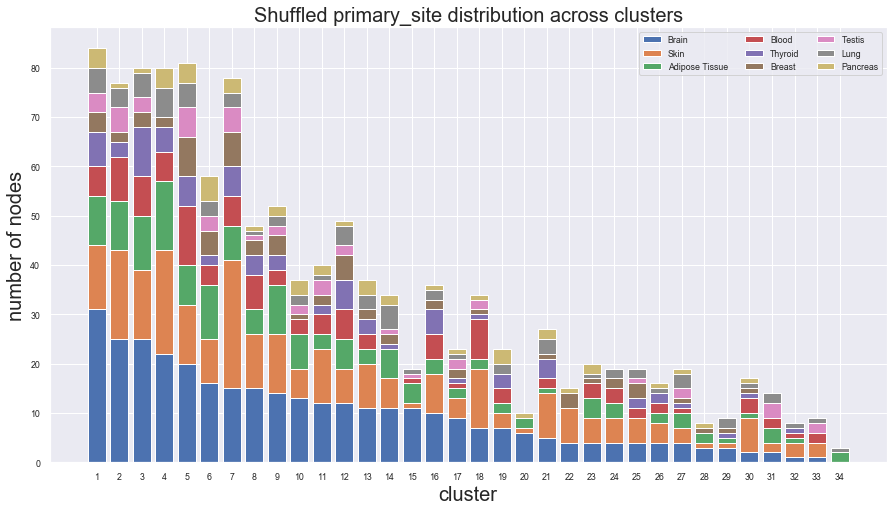

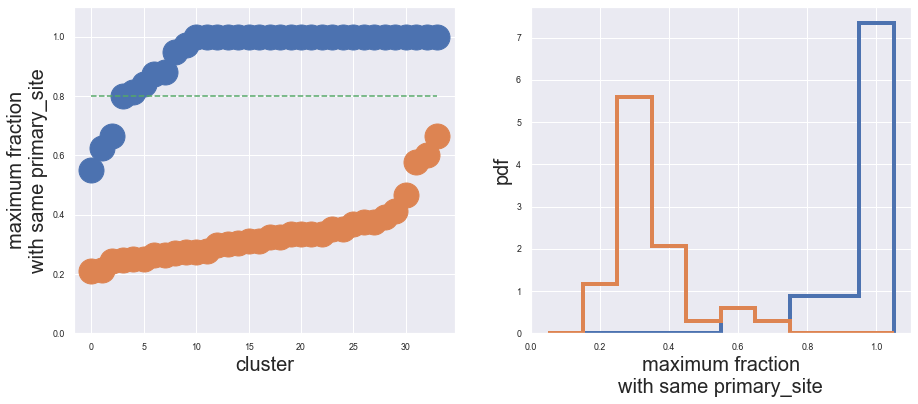

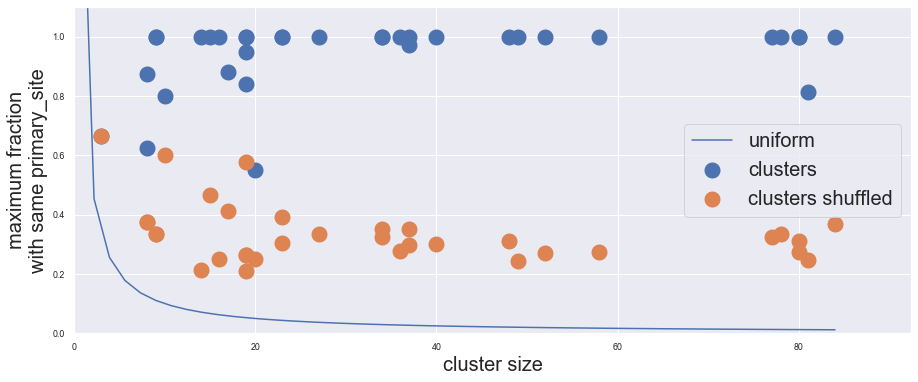

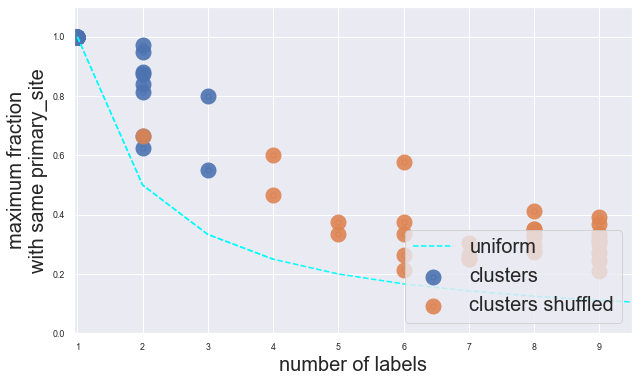

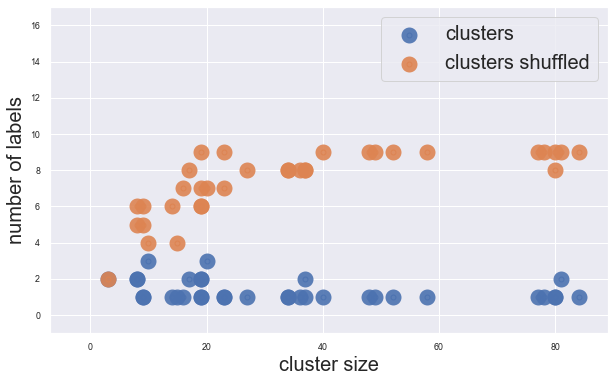

False primary_site 1


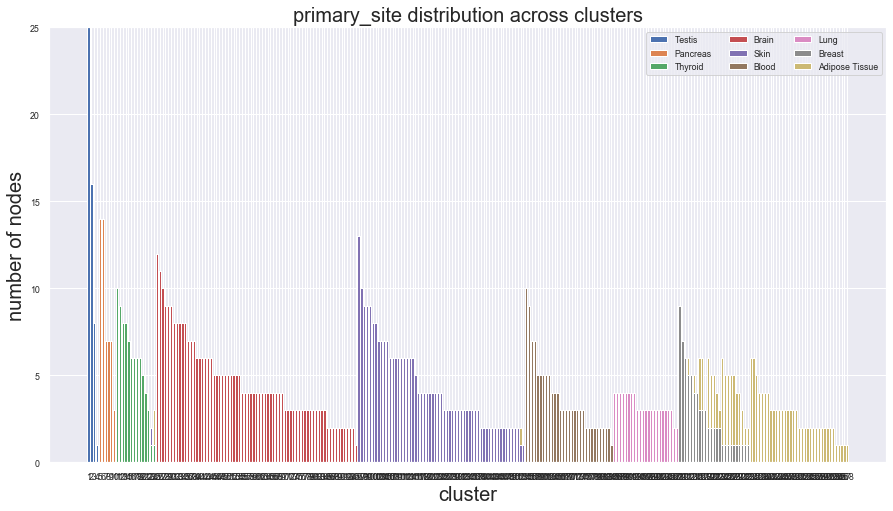

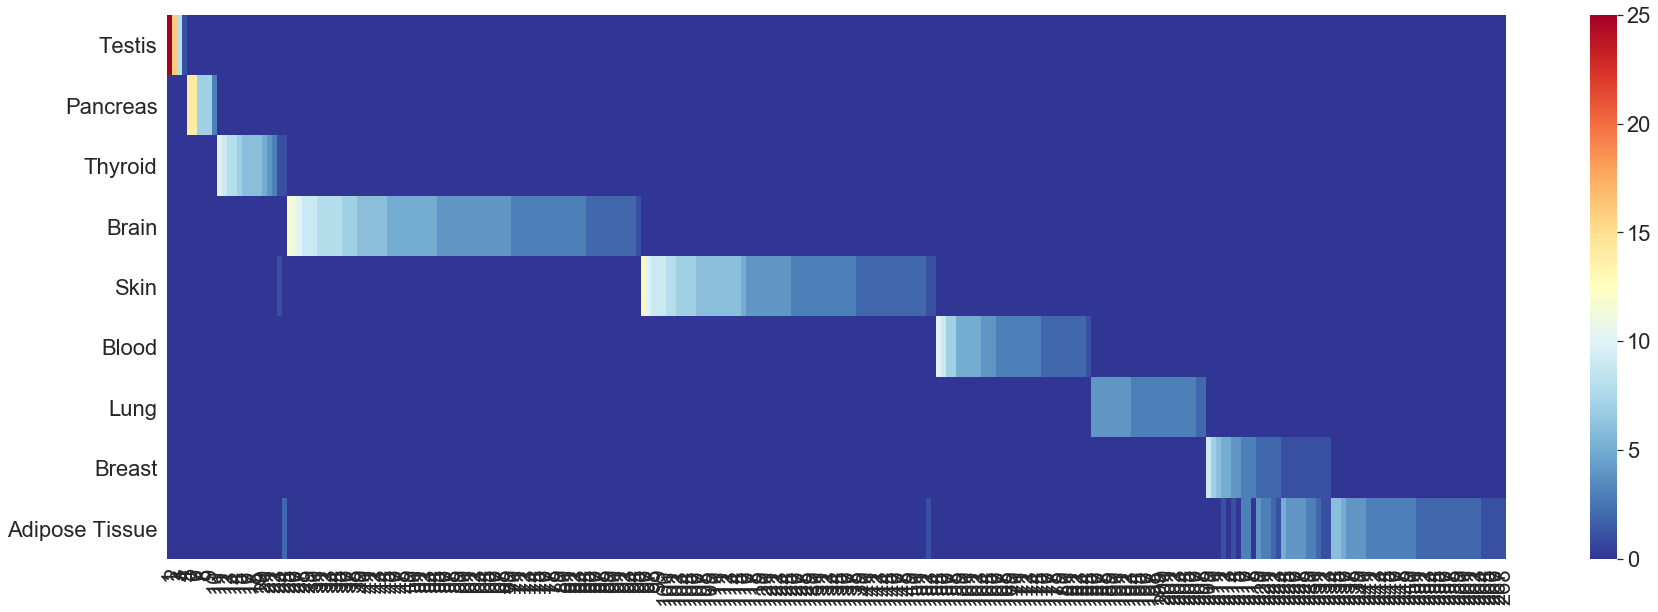

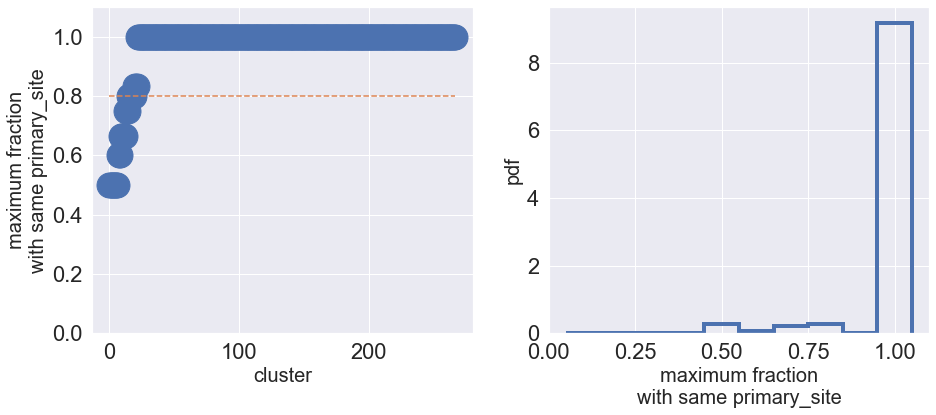

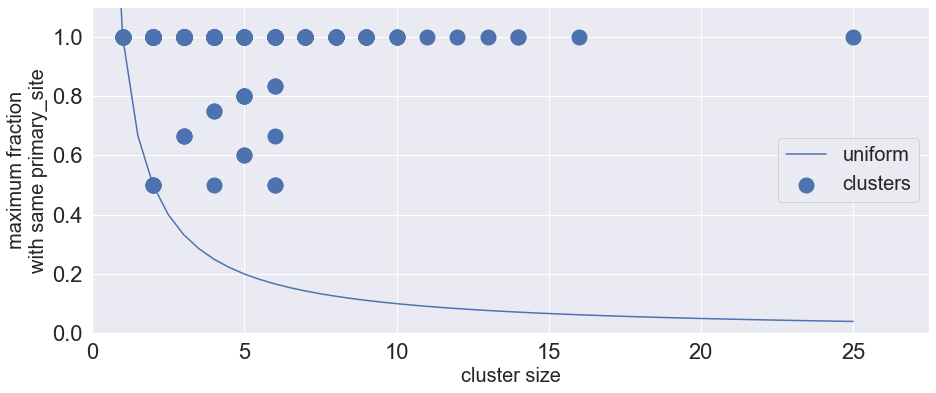

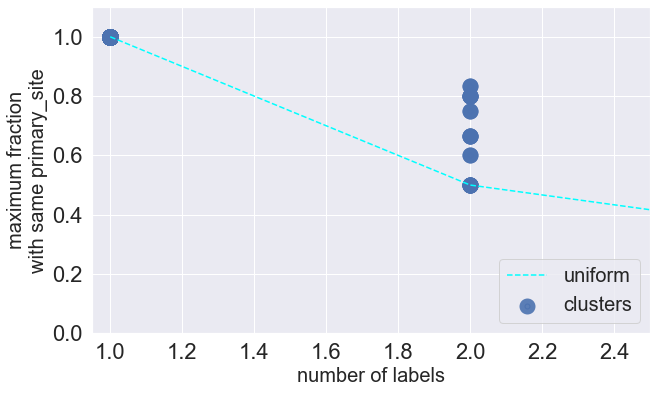

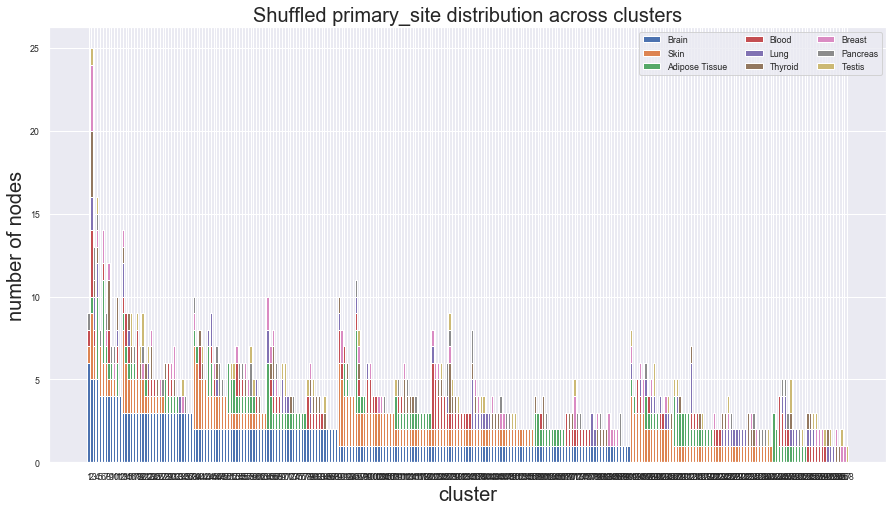

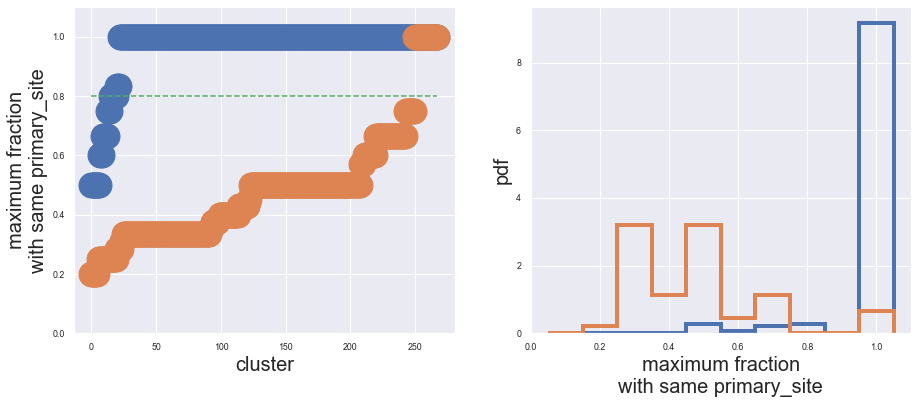

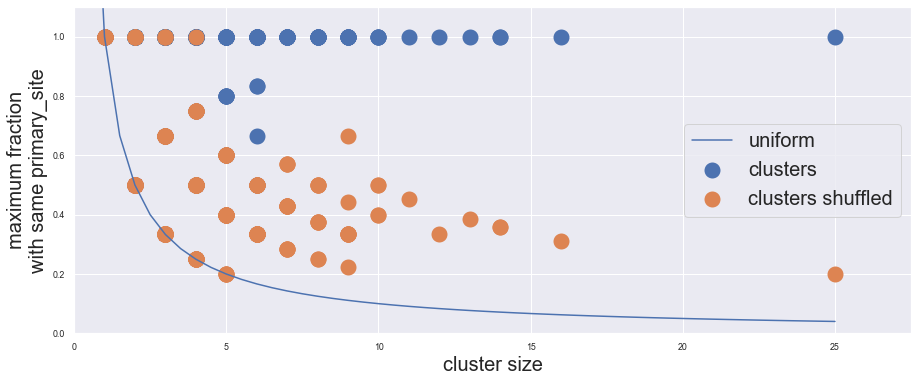

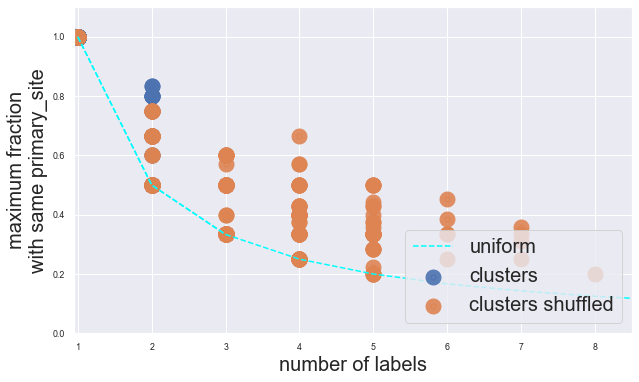

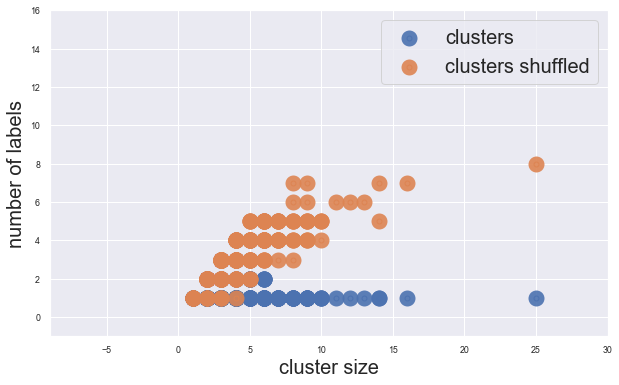

False secondary_site 4


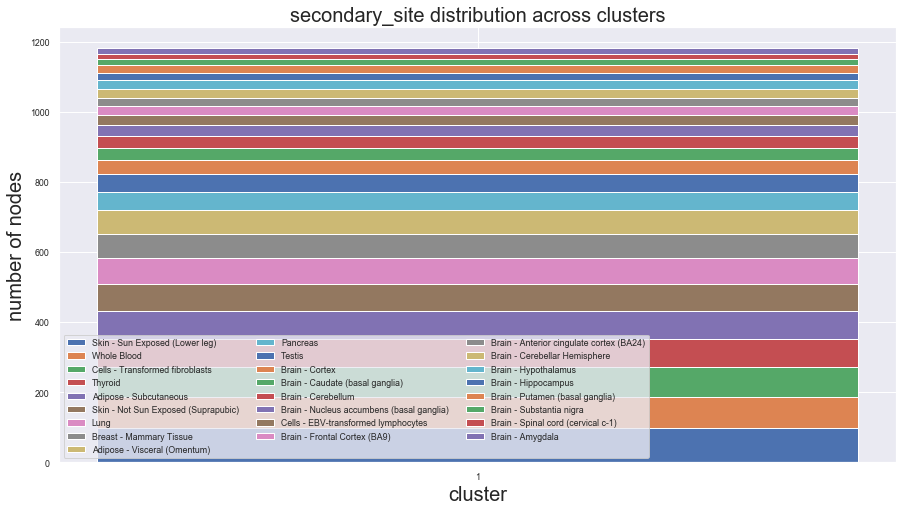

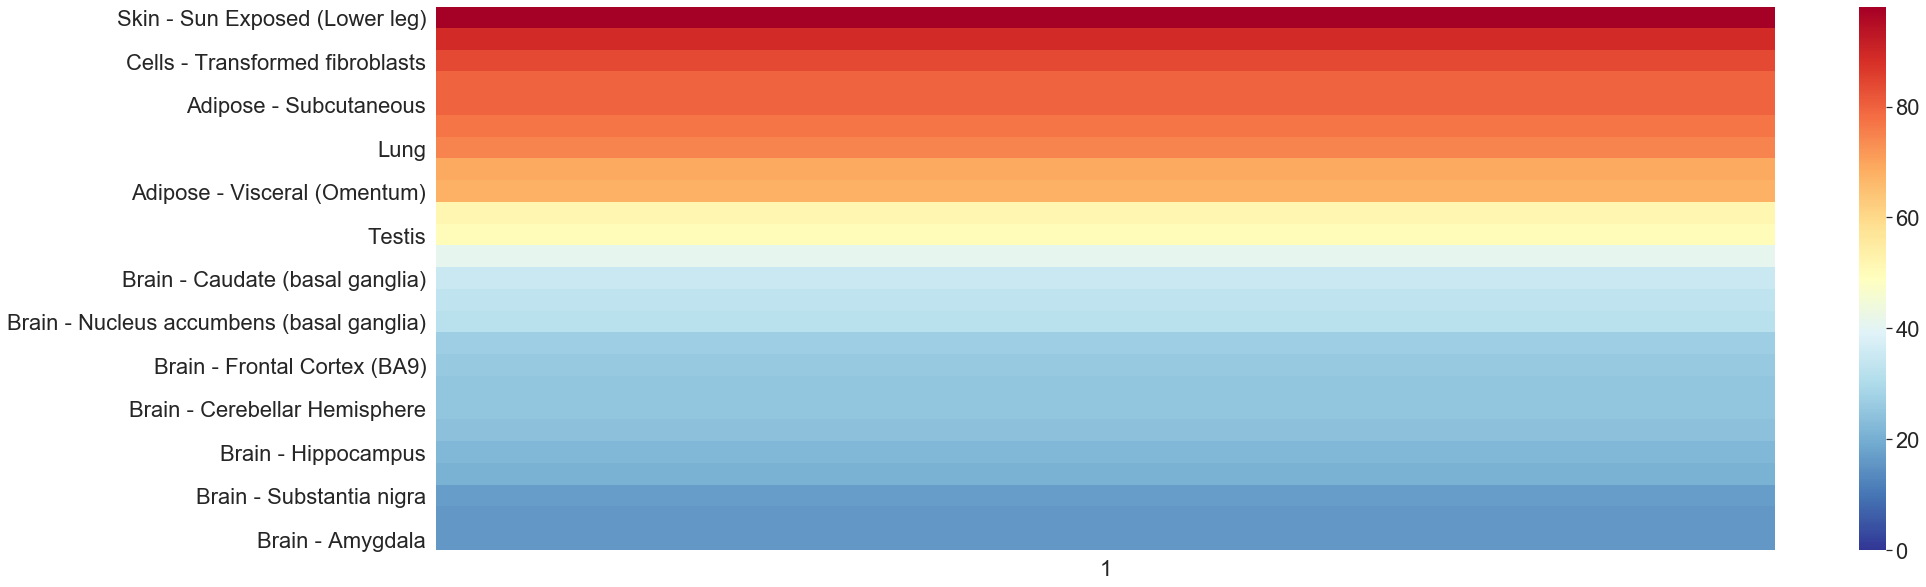

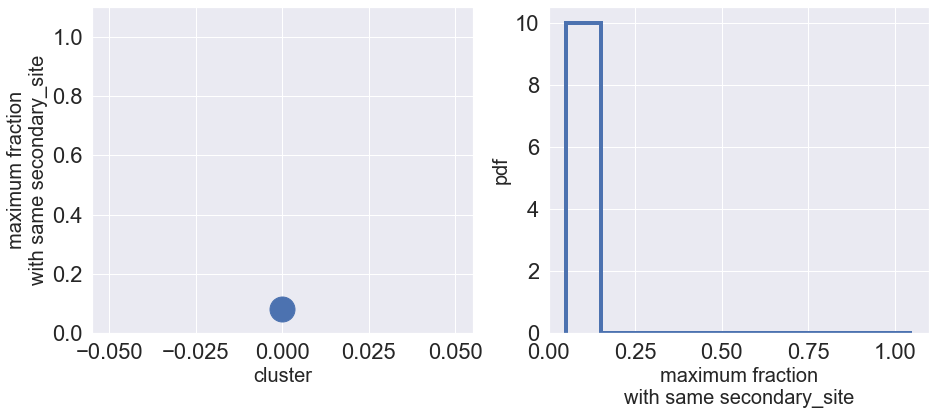

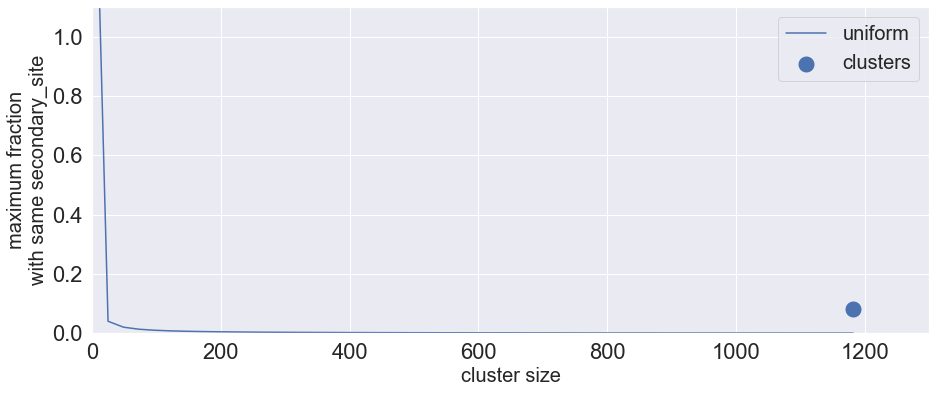

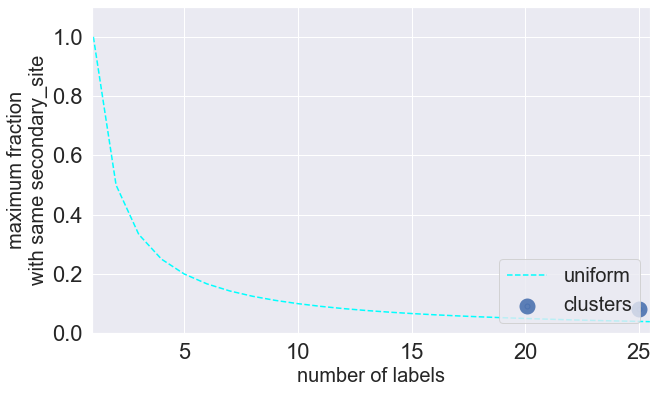

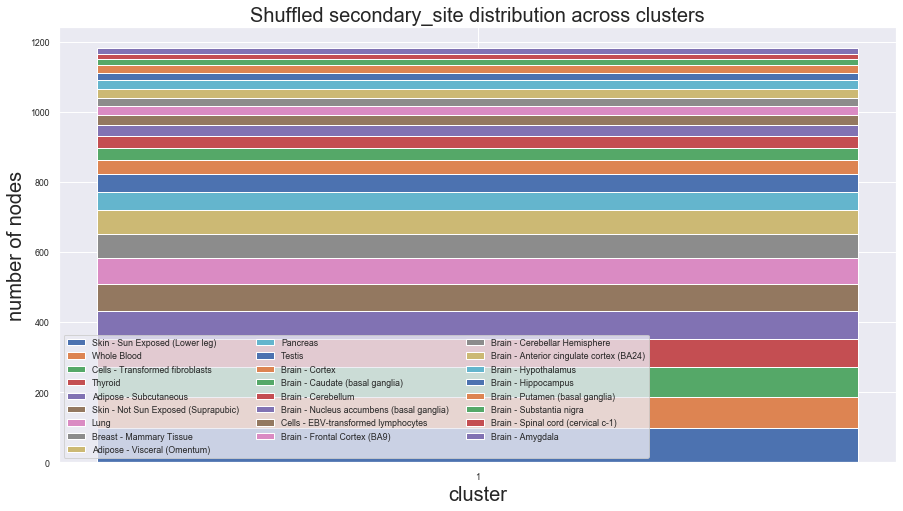

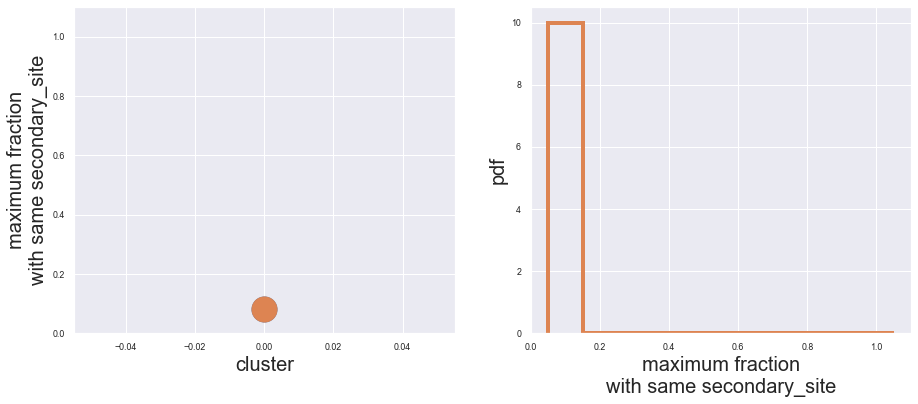

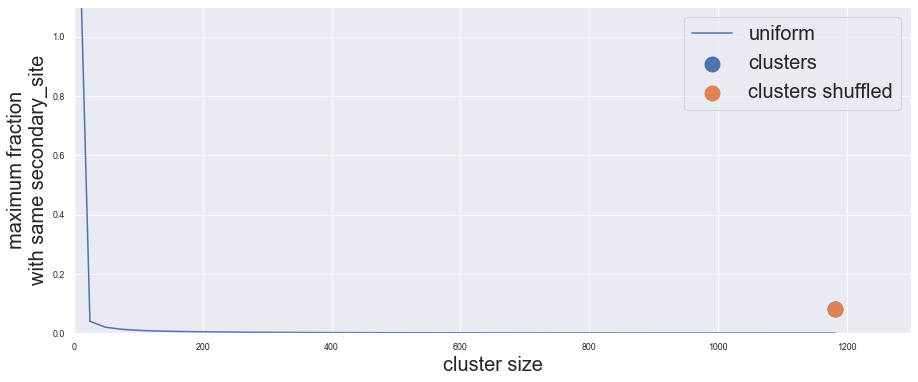

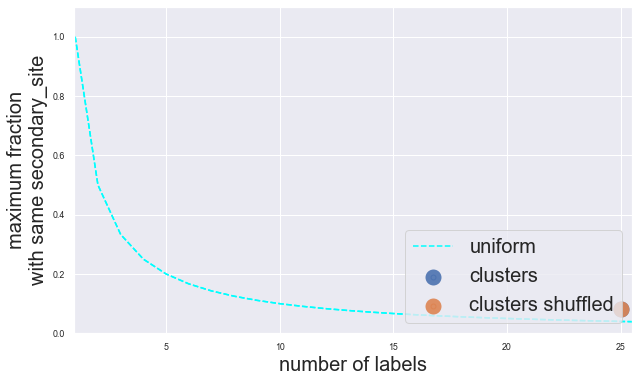

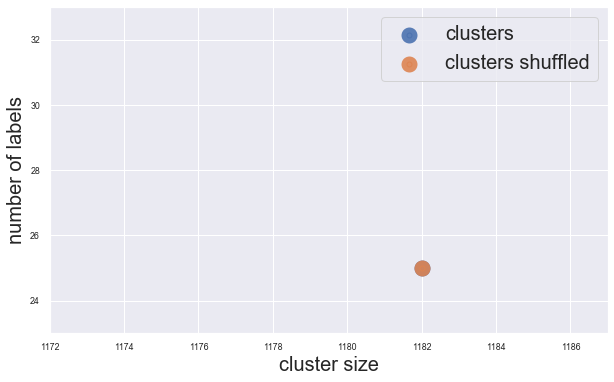

False secondary_site 3


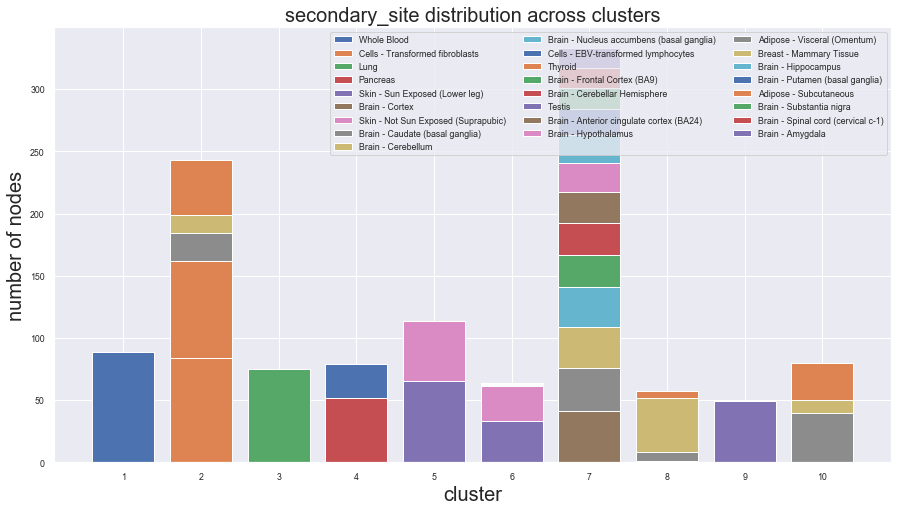

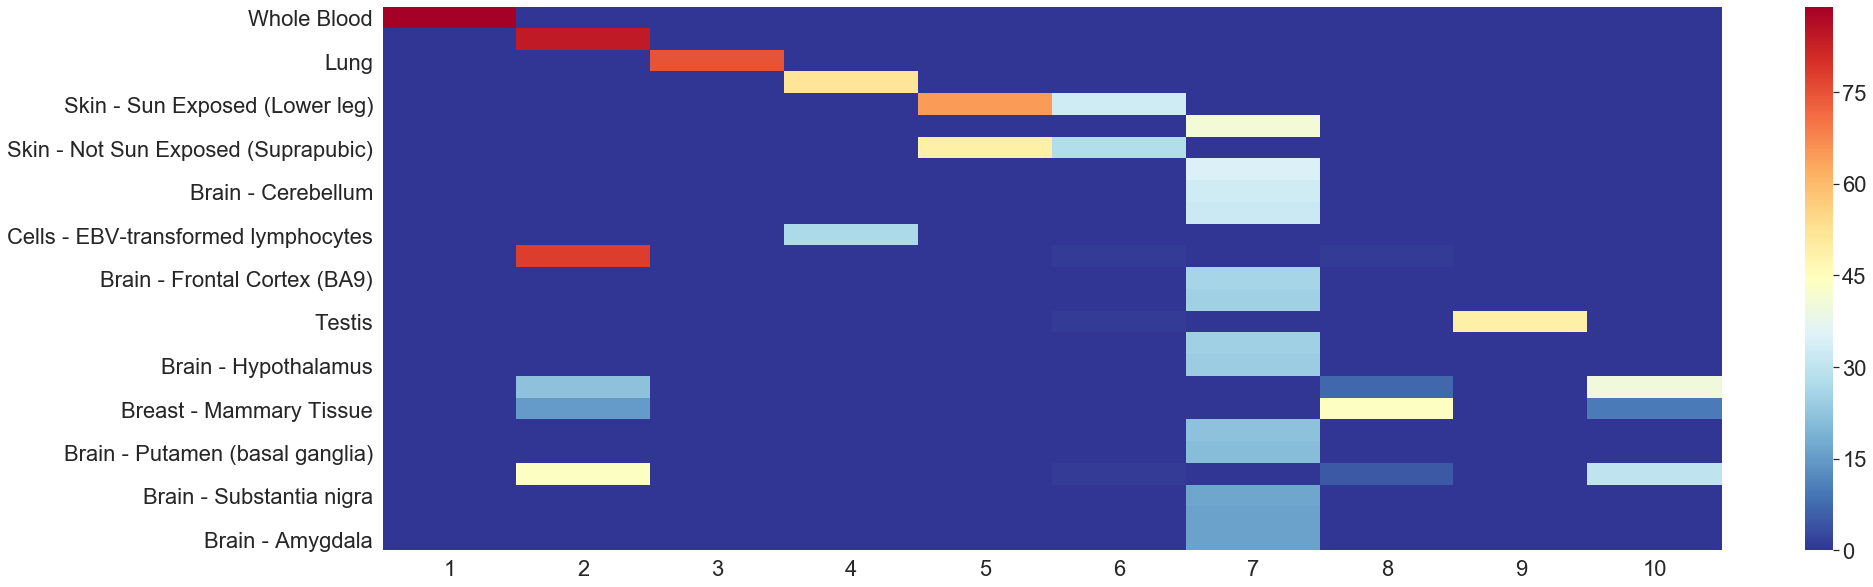

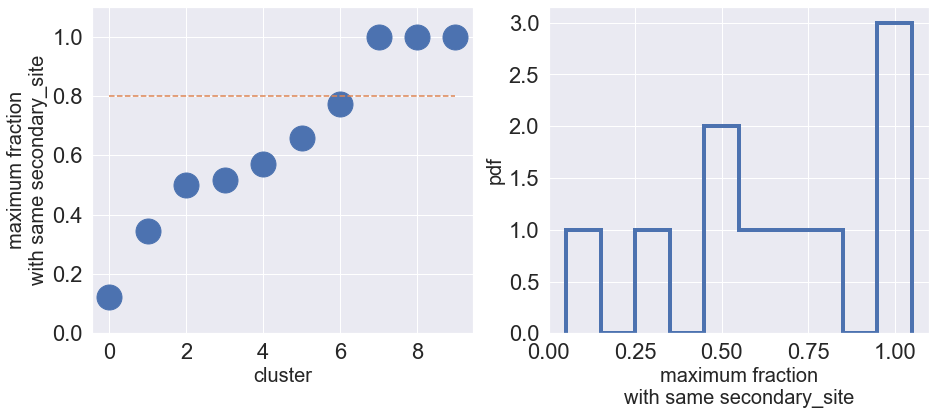

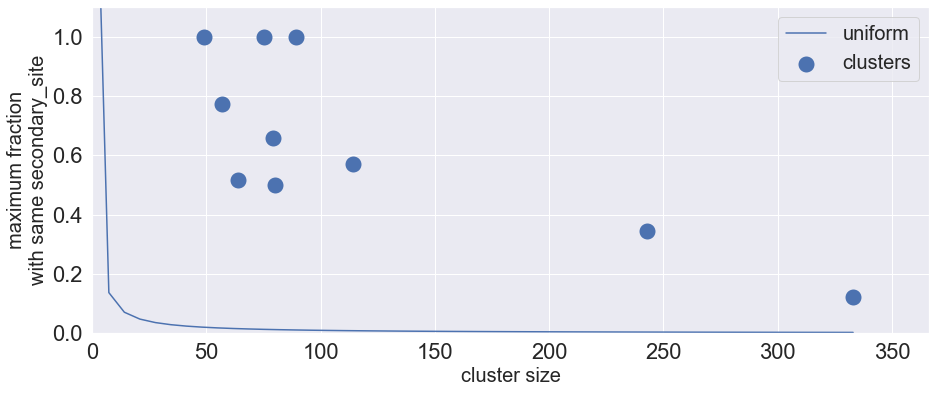

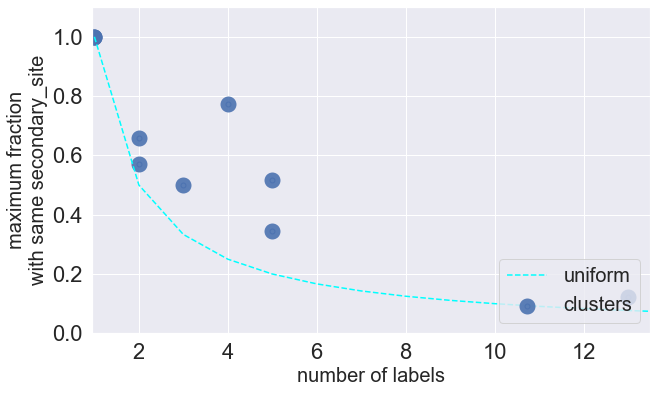

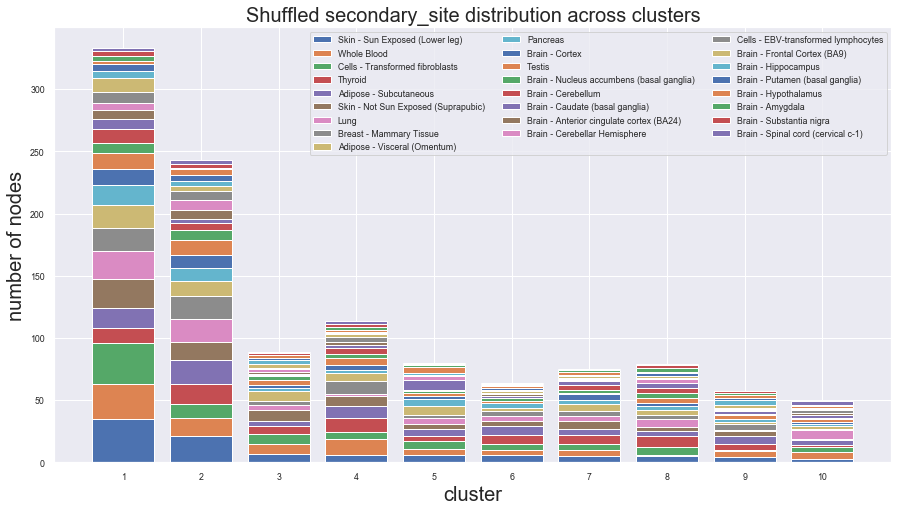

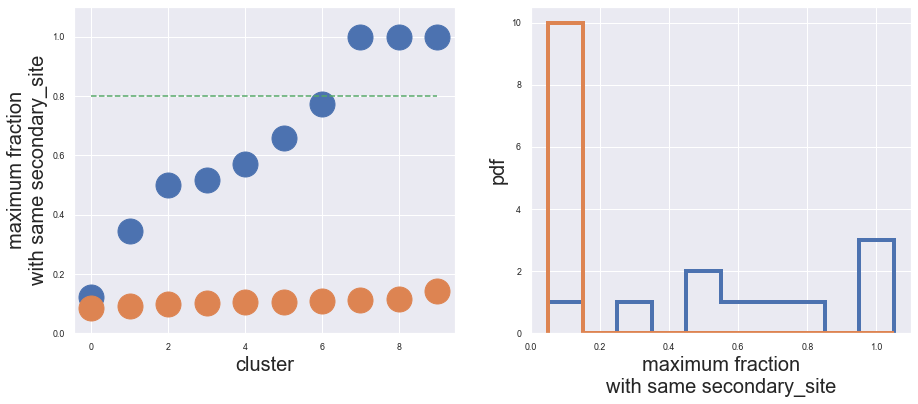

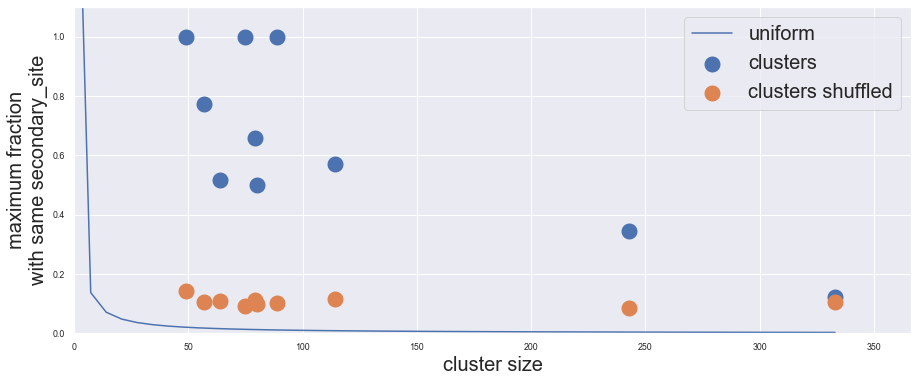

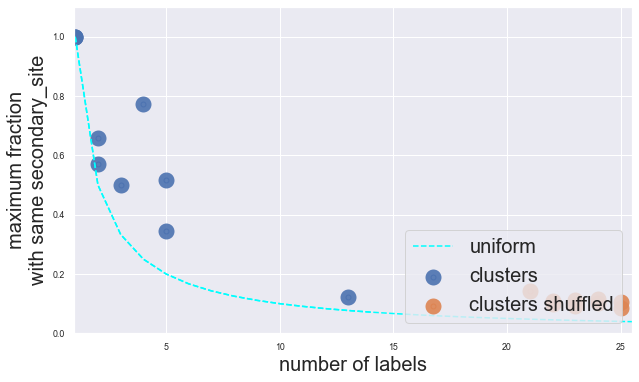

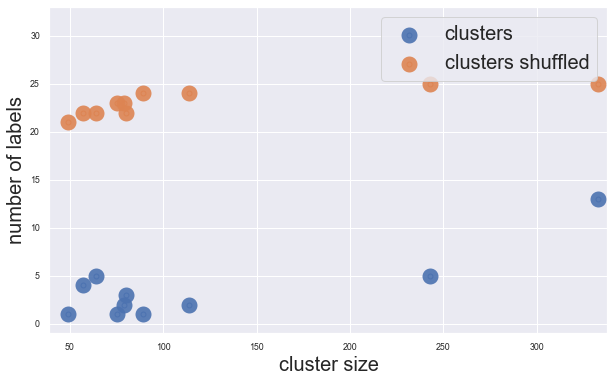

False secondary_site 2


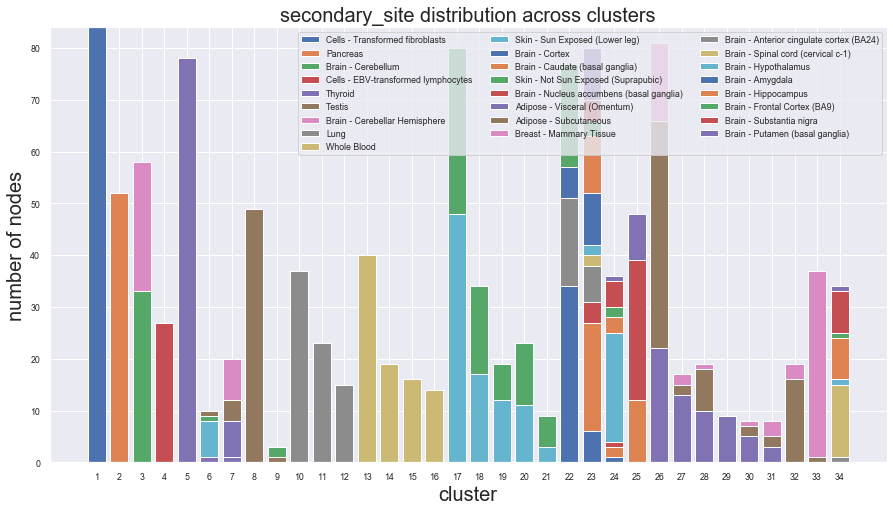

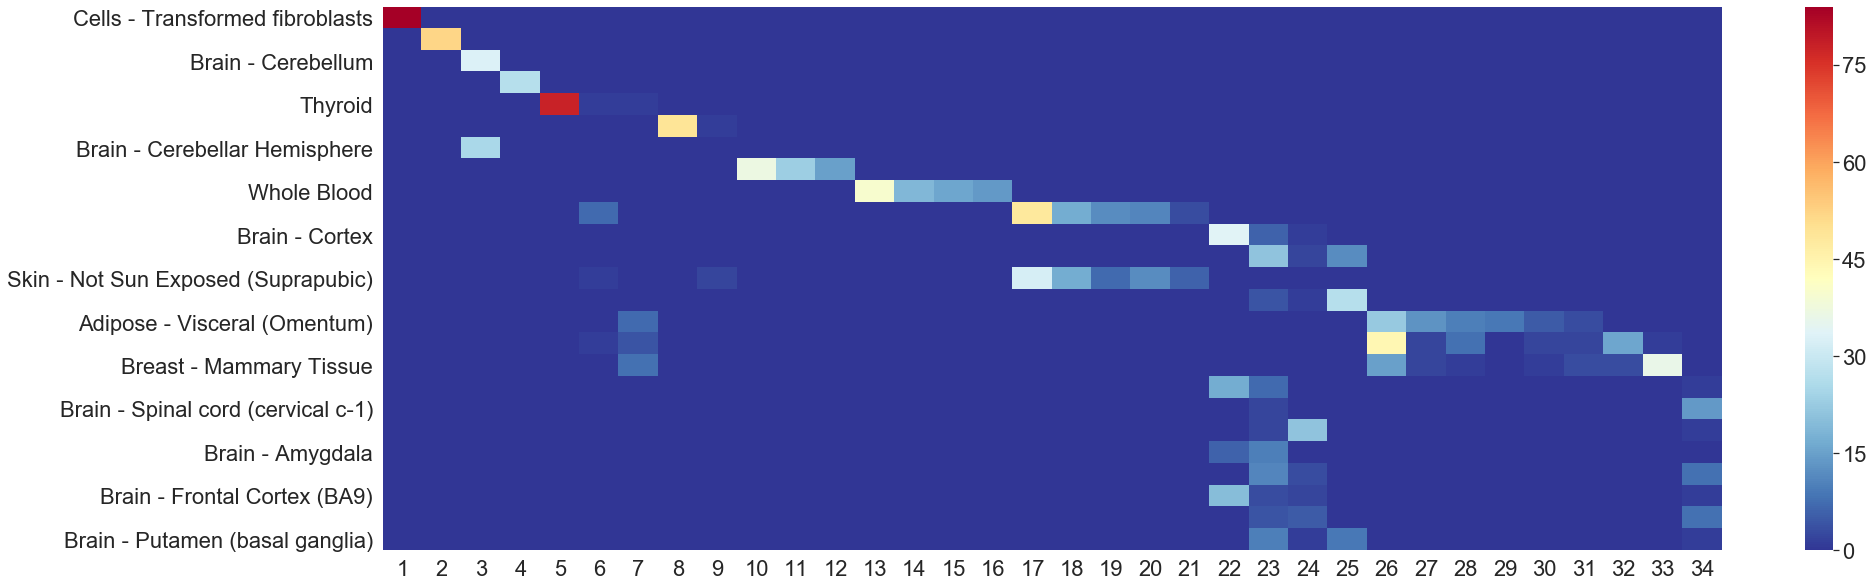

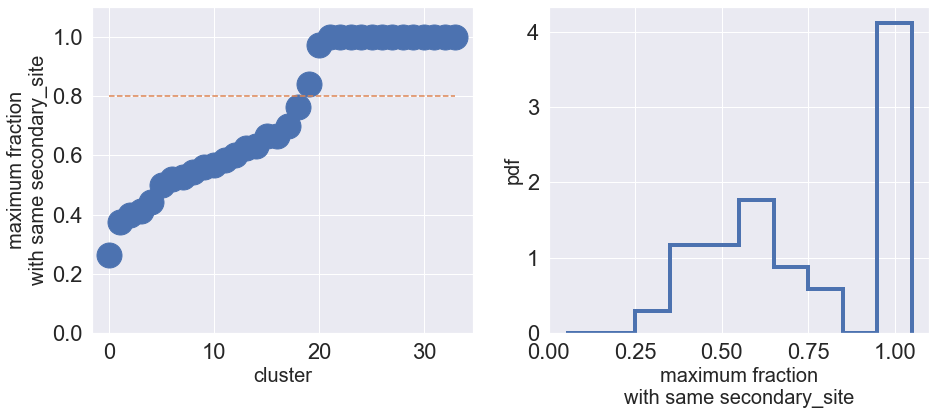

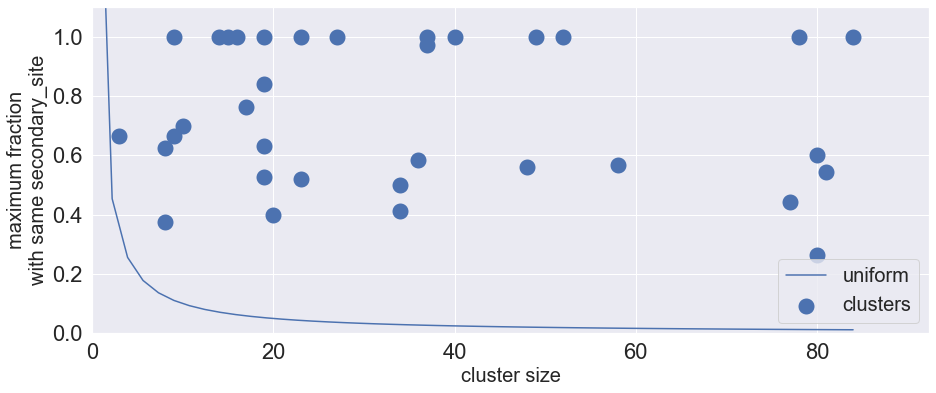

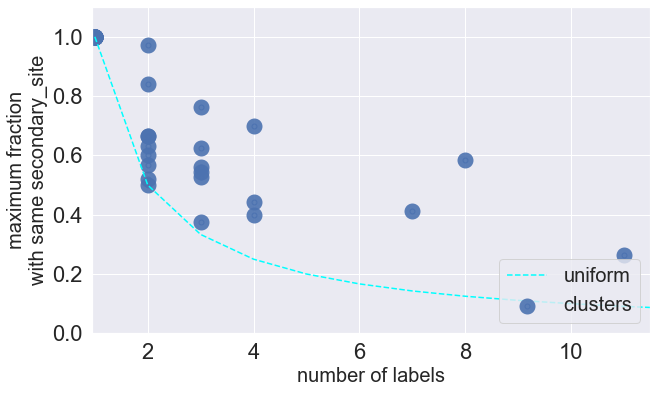

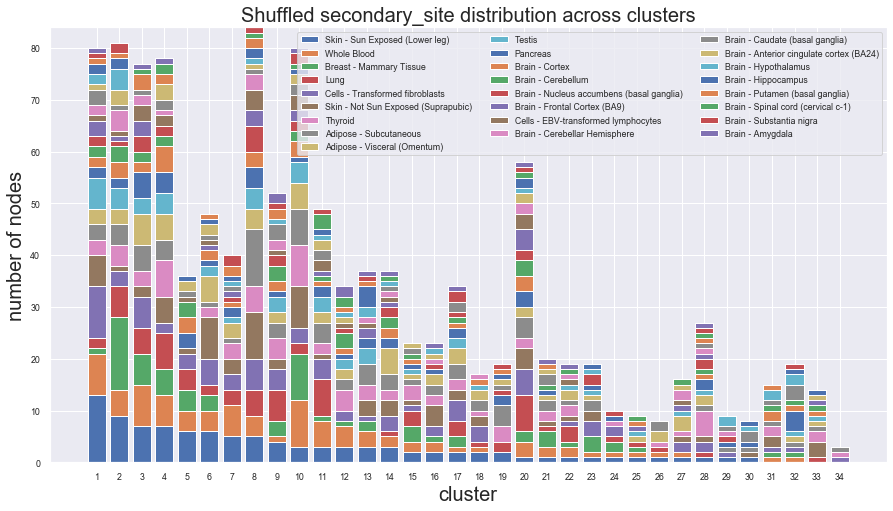

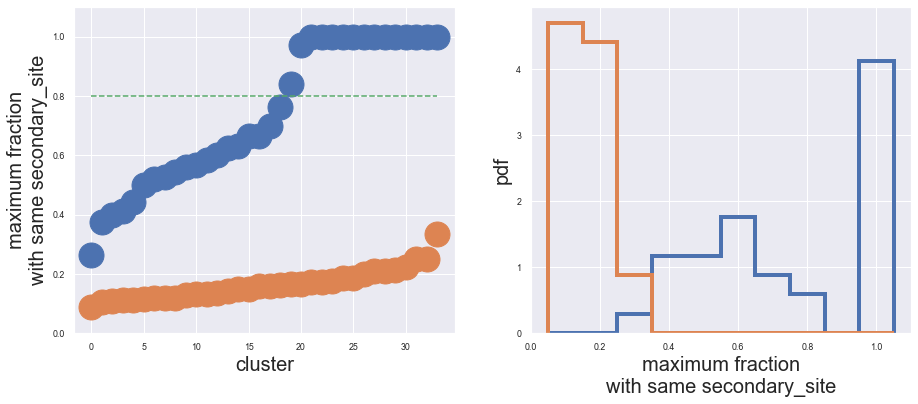

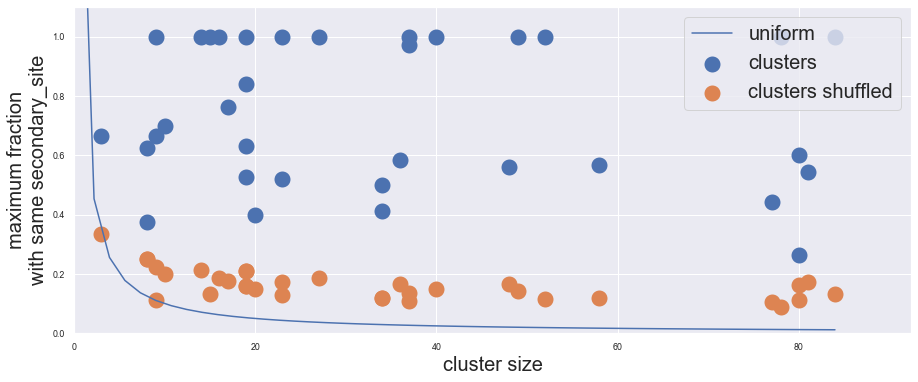

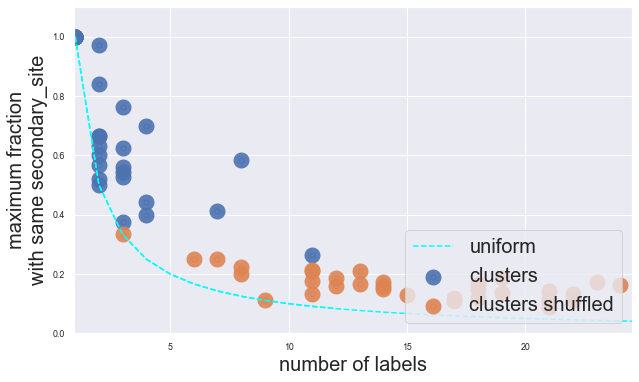

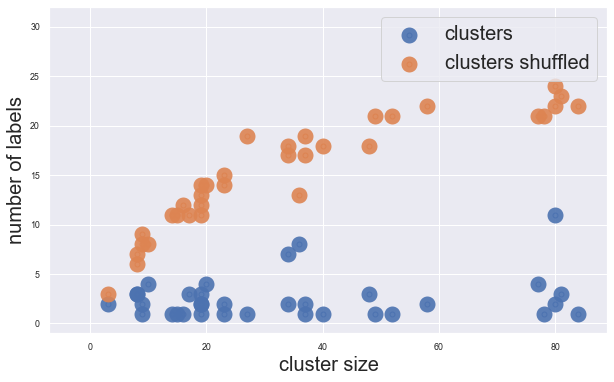

False secondary_site 1


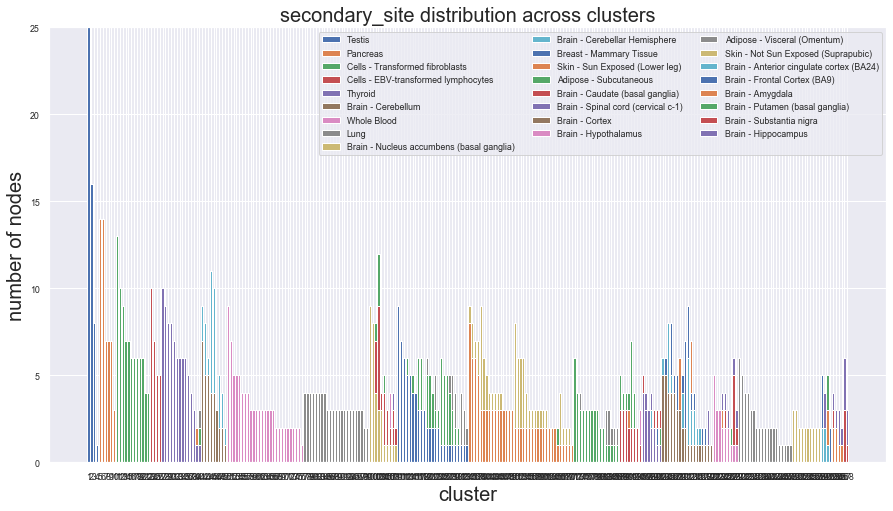

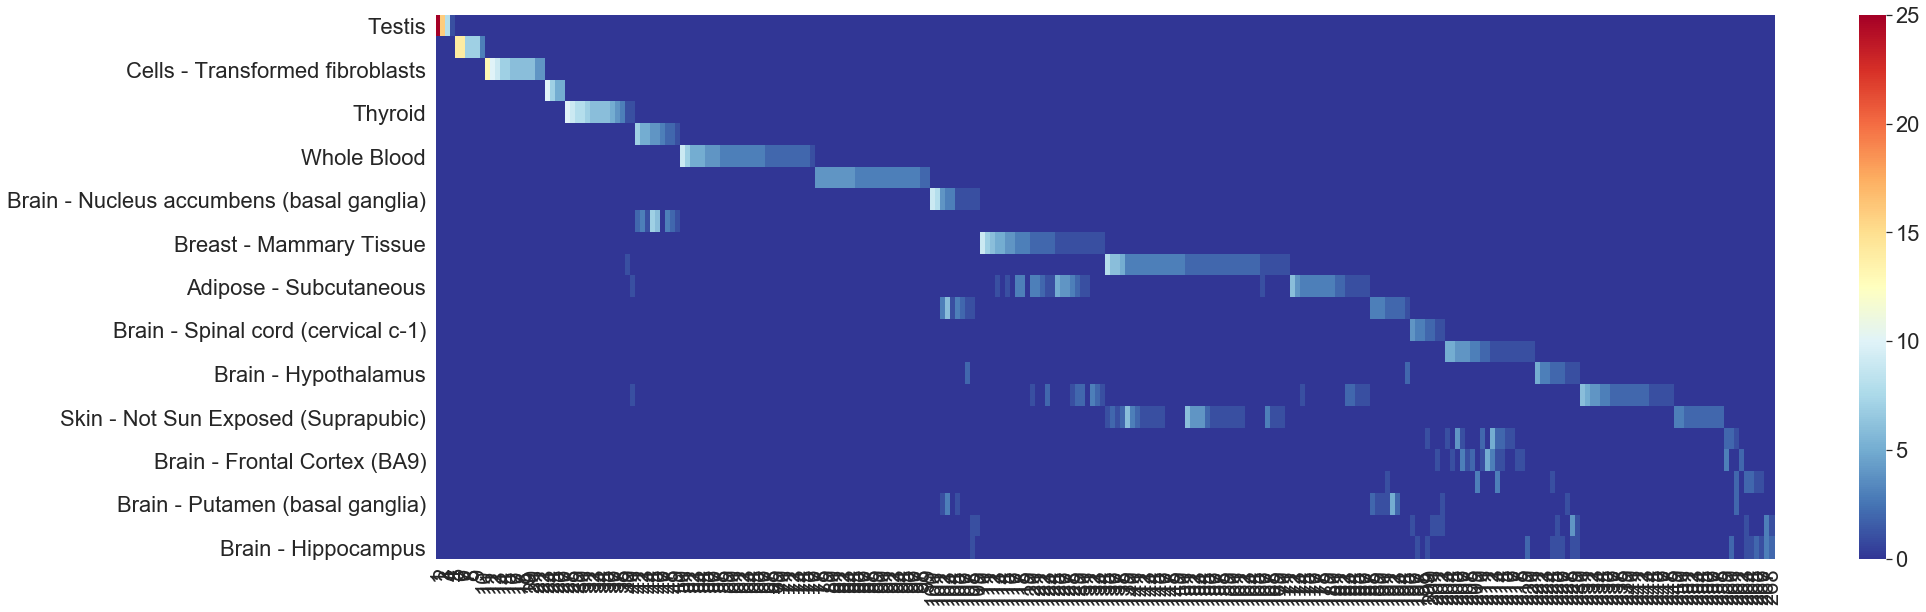

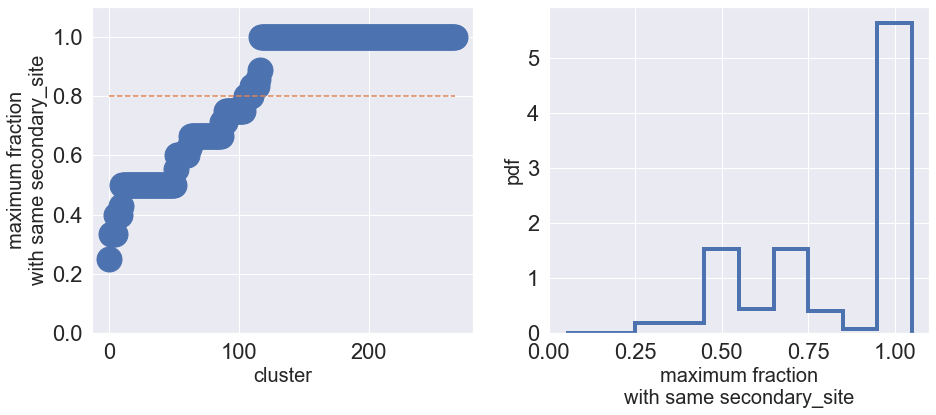

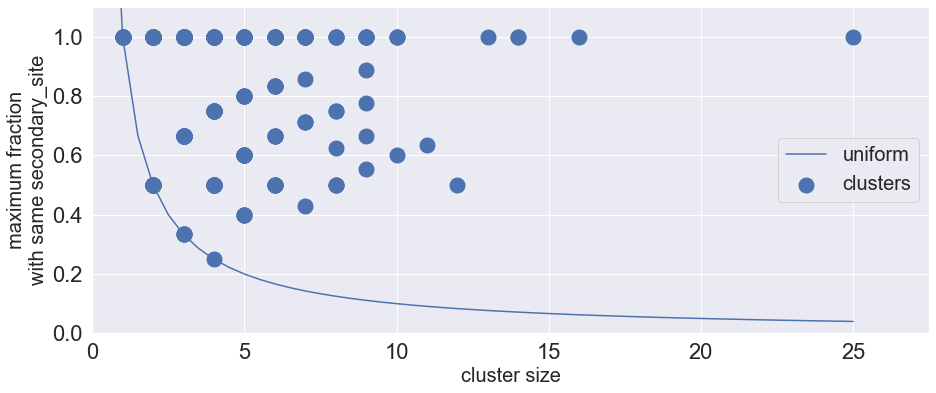

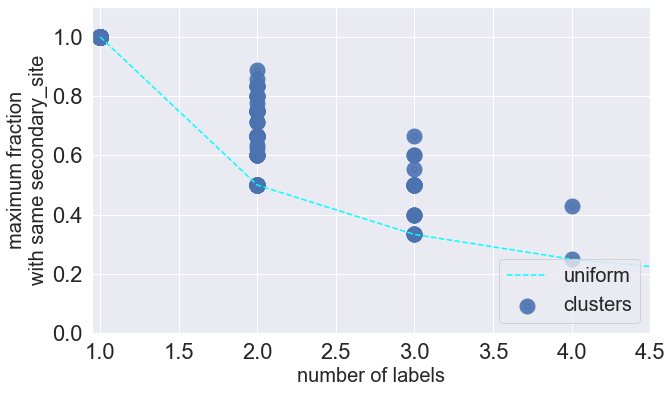

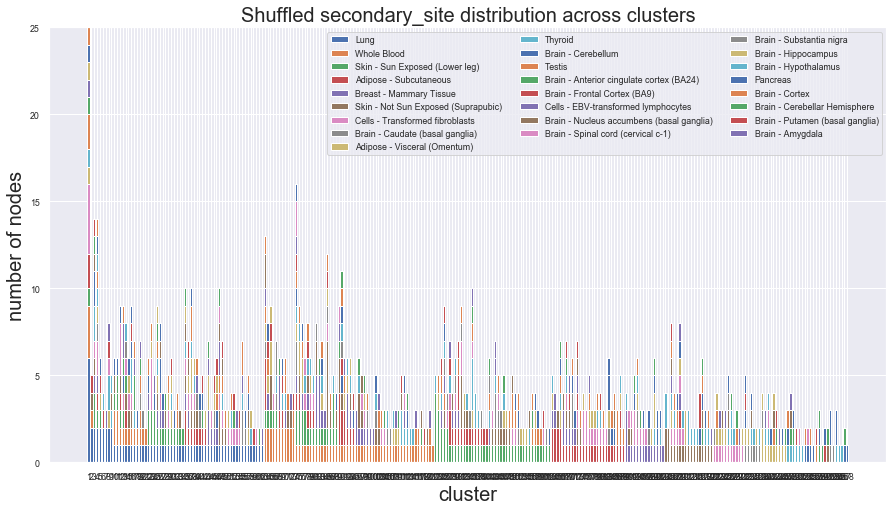

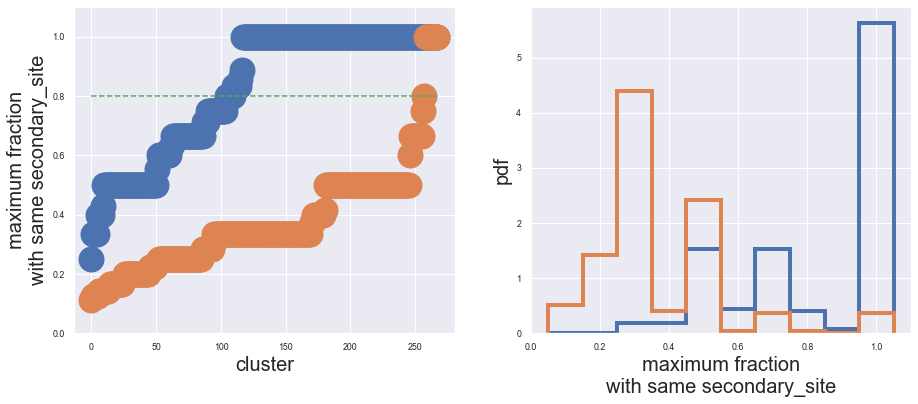

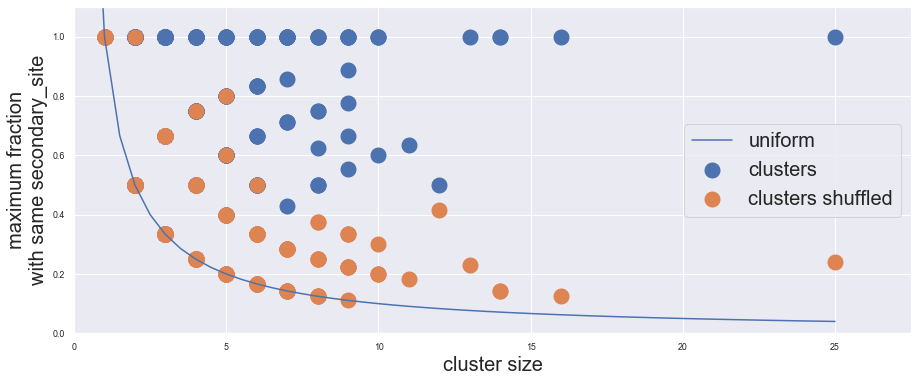

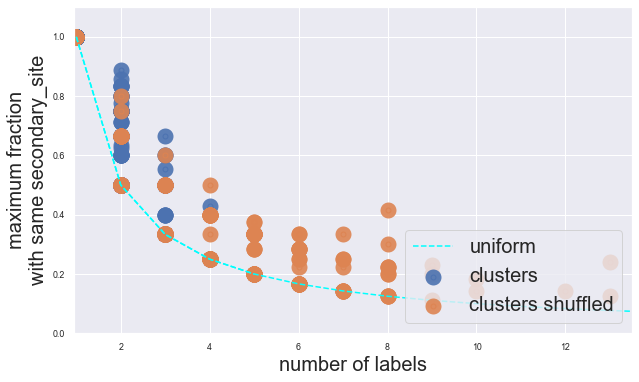

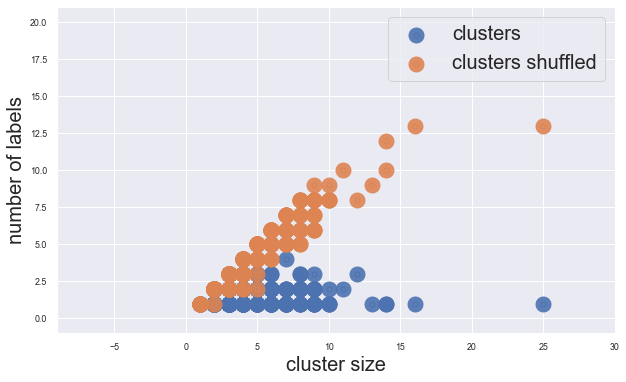

In [4]:
for normalise in [True, False]:
    for label in labels:
        for level in np.arange(L+1)[::-1]:
            if level==0:
                #pass
                continue
            print(normalise, label, level)
            try:
                cluster = get_cluster_given_l(level, directory,algorithm=algorithm)
                fraction_sites = get_fraction_sites(cluster,df_files=df_files,label=label, normalise=normalise)

                #fsdf = pd.DataFrame(data=fraction_sites)
                #fsdf = fsdf.drop('Other', axis=1)
                #fsdf = fsdf.divide(fsdf.sum(axis=1), axis=0).fillna(0)
                #fraction_sites = fsdf.sort_values(by=fsdf.columns.to_list(), ascending=True).to_dict(orient='list')

                clustersinfo = get_clustersinfo(cluster,fraction_sites)
                plot_cluster_composition(fraction_sites,directory,level,label=label, normalise=normalise,algorithm=algorithm)
                make_heatmap(fraction_sites, directory, label, level, normalise=normalise,algorithm=algorithm)

                clustersinfo = get_clustersinfo(cluster,fraction_sites)            
                if not normalise:
                    plot_maximum(clustersinfo,cluster,label,level, directory,algorithm=algorithm)
                    plot_maximum_size(clustersinfo,label,level, directory,algorithm=algorithm)
                    plot_maximum_label(clustersinfo,label,level, directory,algorithm=algorithm)
            except:
                print(sys.exc_info()[0])
            try:
                fraction_sites_shuffle = get_fraction_sites(cluster, pd.read_csv("%s/files.dat.shuf"%directory, index_col=[0]),label=label, normalise=normalise)
                clustersinfo_shuffle = get_clustersinfo(cluster, fraction_sites_shuffle)
                plot_cluster_composition(fraction_sites_shuffle,directory,level, label=label, shuffled=True, normalise=normalise)
                if not normalise:
                    plot_maximum(clustersinfo,cluster,label,level,directory,clustersinfo_shuffle,algorithm=algorithm)
                    plot_maximum_size(clustersinfo,label,level, directory,clustersinfo_shuffle,algorithm=algorithm)
                    plot_maximum_label(clustersinfo,label,level, directory,clustersinfo_shuffle,algorithm=algorithm)
                    plot_labels_size(clustersinfo,label,level, directory,clustersinfo_shuffle,algorithm=algorithm)
            except:
                print("must shuffle files")

In [ ]:
def reindex(x):
    i=1
    last=x[0]
    new = []
    for xi in x:
        if xi == last:
            pass
        else:
            i+=1
            last=xi
        new.append(i)
    return new

df_clusters = pd.read_csv("%s/%s/%s_level_%d_clusters.csv"%(directory,algorithm,algorithm,L), header=[0])
df_labels = pd.DataFrame()
shape = df_clusters.dropna().shape
files = df_clusters.dropna().values.reshape(shape[0]*shape[1],)
for level in np.arange(L+1)[::-1]:
    print(level)
    df_clusters = pd.read_csv("%s/%s/%s_level_%d_clusters.csv"%(directory,algorithm,algorithm,level), header=[0])
    currentlevellabels = []
    for file in files:
        s = df_clusters[df_clusters.isin([file])].any(0)
        a = s.index[s]
        currentlevellabels.append(int(a[0][8:])-1)
    df_labels.insert(0,'l%d'%level,currentlevellabels)
    del currentlevellabels
filelabels = []
filesublabels = []
for file in files:
    filelabels.append(get_file(file, df_files)[labels[0]])
    filesublabels.append(get_file(file, df_files)[labels[1]])
df_labels.insert(0,'tissue', filelabels)
df_labels.insert(0,'subtissue', filesublabels)
df_labels.sort_values(by=['tissue','subtissue'], inplace=True)
df_labels.sort_values(by=["l%d"%l for l in np.arange(L+1)[::-1]], axis=0, inplace=True)
filelabels = df_labels['tissue']
filesublabels = df_labels['subtissue']
df_labels = df_labels.apply(reindex, axis=0)
df_labels['tissue']=filelabels
df_labels['subtissue']=filesublabels
df_labels.to_csv("%s/%s/topsbm_labels.csv"%(directory,algorithm), index=False, header=True)

In [111]:
try:
    xl = getclustersizesarray(directory, L)
    with open("%s/clustersizes.txt" % directory, 'w') as f:
        for x in xl:
            f.write("%d\n" % x)
except:
    print("cannot save clustersizes.txt")

try:
    xl = gettopicsizesarray(directory, L)
    with open("%s/topicsizes.txt" % directory, 'w') as f:
        for x in xl:
            f.write("%d\n" % x)
except:
    print("cannot save topicsizes.txt")

In [70]:
scores = get_scores(directory, labels, L=L, verbose=False)

shuffled files not found


{'primary_site': {'h': [1.0000000000000002,
   0.9787997423691726,
   0.951387422829308,
   0.9209726318573392,
   0.8278545837245156,
   3.717588716252942e-16],
  'c': [0.2593464367686703,
   0.3123367348927619,
   0.4038378875375964,
   0.5590948853446135,
   0.7420149798456172,
   1.0],
  'V': [0.41187465052765265,
   0.4735597220423711,
   0.5669998695068769,
   0.6957940526757027,
   0.7825879506326332,
   7.435177432505881e-16]},
 'disease_type': {'h': [1.0000000000000002,
   0.9427242645748487,
   0.8919989260473135,
   0.8552886039743824,
   0.7539336514629197,
   4.197387025682827e-16],
  'c': [0.24582623524375868,
   0.28514243215961493,
   0.3588904745839526,
   0.49215219311431113,
   0.6405303138601531,
   1.0],
  'V': [0.39463968295010304,
   0.4378499561420864,
   0.5118436813613444,
   0.624787616793471,
   0.692620778177501,
   8.39477405136565e-16]},
 'disease_tissue': {'h': [1.0000000000000002,
   0.9519816953662131,
   0.9073056412316177,
   0.8707547428467659,
   0

In [71]:
xl = [len(get_cluster_given_l(li,directory)) for li in np.linspace(0,L,L+1)]
with open("%s/clustersizes.txt"%directory,'w') as f:
    for x in xl:
        f.write("%d\n"%x)

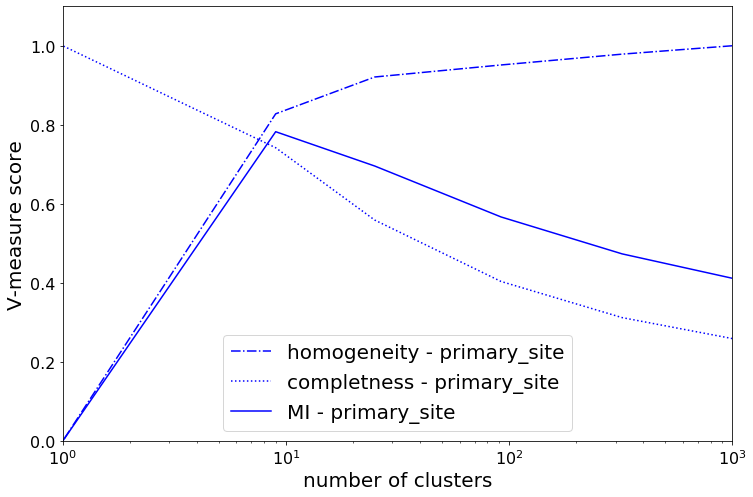

In [72]:
fig=plt.figure(figsize=(12,8))
ax = fig.subplots(1)
add_score_lines(ax,scores,[labels[0]],xl, h=True, c=True, alpha=1)
#h = np.array(scores['primary_site']['h'])
#c = np.array(scores['secondary_site']['c'])
#ax.plot(xl, 2*h*c/(h+c), ls='-',c='g')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()
fig.savefig("%s/metric_scores_primarysite.pdf"%(directory))

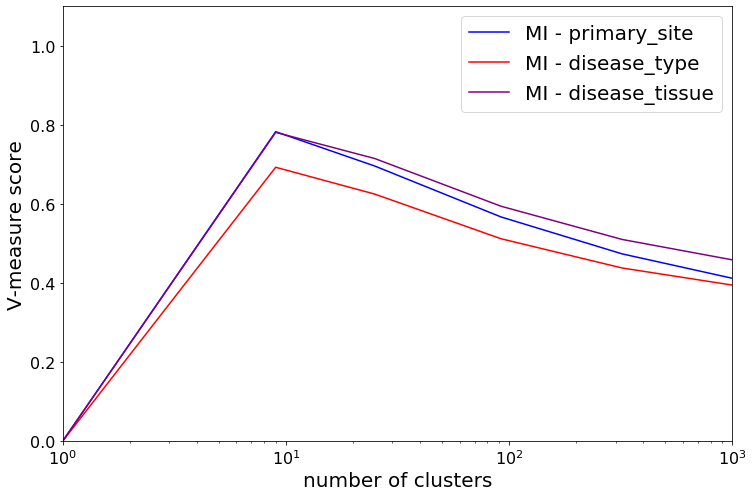

In [75]:
fig=plt.figure(figsize=(12,8))
ax = fig.subplots(1)
add_score_lines(ax,scores,labels,xl)
#h = np.array(scores['primary_site']['h'])
#c = np.array(scores['secondary_site']['c'])
#ax.plot(xl, 2*h*c/(h+c), ls='-',c='g')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()
fig.savefig("%s/metric_scores.pdf"%(directory))

In [76]:
h = np.array(scores[labels[0]]['h'])
c = np.array(scores[labels[1]]['c'])
scores['hSBM'] = {
    'h':h,
    'c':c,
    'V':2*h*c/(h+c)
}

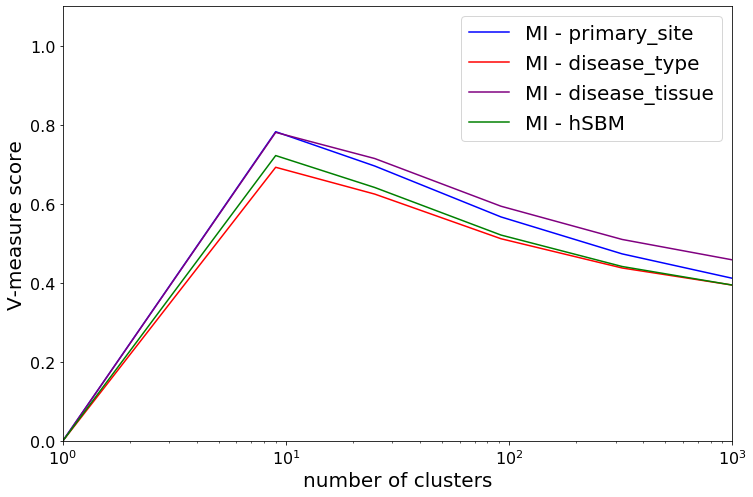

In [77]:
fig=plt.figure(figsize=(12,8))
ax = fig.subplots(1)
add_score_lines(ax,scores,np.concatenate((labels,['shuffle','hSBM'])),xl)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()
fig.savefig("%s/metric_scores_shuffle.pdf"%(directory))

In [78]:
scores['hierarchical'] = pd.read_csv("%s/hierarchical.scores"%directory).to_dict(orient='list')

FileNotFoundError: [Errno 2] File b'/Volumes/GoogleDrive/My Drive/tesi_magistrale/tesi/results/hsbm/highlyvariable_7tissues//hierarchical.scores' does not exist: b'/Volumes/GoogleDrive/My Drive/tesi_magistrale/tesi/results/hsbm/highlyvariable_7tissues//hierarchical.scores'

KeyError: 'hierarchical'

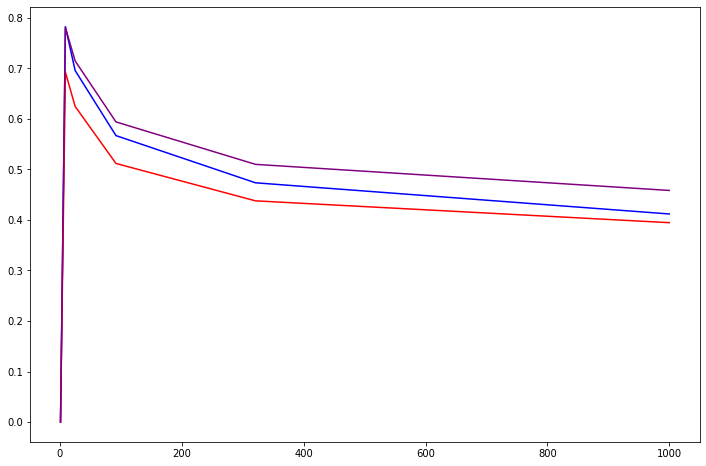

In [79]:
fig=plt.figure(figsize=(12,8))
ax = fig.subplots(1)
add_score_lines(ax,scores,np.concatenate((labels,['shuffle','hierarchical'])),xl, h=False, c=False)
#h = np.array(scores['primary_site']['h'])
#c = np.array(scores['secondary_site']['c'])
#ax.plot(xl, 2*h*c/(h+c), ls='-',c='g')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()
fig.savefig("%s/metric_scores_hier.pdf"%(directory))

In [ ]:
scores['lda'] = pd.read_csv("%s/lda.scores"%directory).to_dict(orient='list')

In [ ]:
fig=plt.figure(figsize=(12,8))
ax = fig.subplots(1)
add_score_lines(ax,scores,['hSBM','hierarchical','shuffle','lda'],xl, lw=2)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()
fig.savefig("%s/metric_scores_all.pdf"%(directory))

# Benchmark
https://scikit-learn.org/stable/modules/clustering.html

In [ ]:
true_labels = []
predicted_labels = []
for c in cluster:
    print(c)
    for sample in cluster[c]:
        #true_labels.append(getFile(sample)['primary_site'].values[0])
        try:
            true_labels.append(df_files.loc[sample][label])
            predicted_labels.append(c)
        except:
            print("error in %s"%sample)

In [ ]:
_, labels_true = np.unique(true_labels,return_inverse=True)

In [ ]:
series_metrics=pd.Series(name=setup+'__level_%d_%s'%(level,label))
series_metrics['MI']=metrics.cluster.normalized_mutual_info_score(labels_true, predicted_labels, average_method='arithmetic')
series_metrics['Homogeneity']=metrics.cluster.homogeneity_score(labels_true, predicted_labels) 
series_metrics['Completness']=metrics.cluster.completeness_score(labels_true, predicted_labels) 
series_metrics['Vmeasure']=metrics.cluster.v_measure_score(labels_true, predicted_labels)
series_metrics['Fowlkes-Mallows']=metrics.cluster.fowlkes_mallows_score(labels_true,predicted_labels)
series_metrics['AdjustedRandIndex']=metrics.cluster.adjusted_rand_score(labels_true,predicted_labels)

In [ ]:
series_metrics

In [ ]:
#df_metrics = pd.DataFrame(columns=['AdjustedRandIndex','MI','Homogeneity','Completness','Vmeasure','Fowlkes-Mallows'])

In [ ]:
try:
    df_metrics.append(series_metrics, ignore_index=False, verify_integrity=True).to_csv("results/hSBM/metrics.csv", index=True,header=True)
except:
    raise

In [ ]:
df_metrics = pd.read_csv("results/hSBM/metrics.csv", index_col=[0],header=[0])
df_metrics.sort_values(by=['MI','Homogeneity'], ascending=False, axis=0, inplace=True)
df_metrics.round(decimals=2)

In [ ]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize=(24, 20)) # set size frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis
ax.set_frame_on(False)  # no visible frame, uncomment if size is ok
tabla = pd.plotting.table(ax, df_metrics.round(decimals=2), loc='upper right', colWidths=[0.12]*len(df_metrics.columns))  # where df is your data frame
tabla.auto_set_font_size(False) # Activate set fontsize manually
tabla.set_fontsize(12) # if ++fontsize is necessary ++colWidths
tabla.scale(1, 2) # change size table
plt.savefig('results/hSBM/metrics.pdf', transparent=True)

In [ ]:
metrics.cluster.contingency_matrix(true_labels, predicted_labels)

In [ ]:
df_files[df_files['primary_site']=='Brain']